## Edelweiss: Data Analysis and Modelling (Part 2) with Word Embeddings

## 1. Data Preprocessing

In [1]:
import pandas as pd
import numpy as np

df=pd.read_csv('edw_launch_price_data_with_am_sp_word_embed.csv')
df.head()


,pid,b1,b2,b3,b4,b5,b6,b7,b8,zone,...,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25
0,1,106.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,Zone A,...,-0.422871,-0.789669,-0.659173,0.189961,0.335592,1.264041,0.054089,-0.131723,-0.580872,0.412611
1,2,NaN,98.0,52.0,NaN,NaN,NaN,NaN,NaN,Zone A,...,-0.056276,-0.577943,-0.373556,-0.023348,0.538932,0.988884,-0.303059,0.348402,-0.405855,0.458890
2,3,NaN,98.0,52.0,NaN,NaN,NaN,NaN,NaN,Zone A,...,-0.055074,-0.553753,-0.389509,-0.025317,0.572751,1.003029,-0.347910,0.379972,-0.367028,0.492925
3,6,107.0,13.0,NaN,NaN,NaN,NaN,NaN,NaN,Zone A,...,-0.174178,-0.400852,-0.209210,-0.201405,0.652291,1.168787,0.021800,0.150187,-0.344659,0.357670
4,7,1.0,22.0,10.0,NaN,NaN,NaN,NaN,NaN,Zone A,...,-0.063372,-0.468529,-0.364467,-0.108515,0.692411,1.022727,-0.269232,0.352715,-0.367375,0.468766


#### 1.1 Creation of micro_market number and developer_number columns

In [2]:
df['micro_market_number']=df['micro_market'].str.extract('(\d+)')
df['developer_number']=df['developer'].str.extract('(\d+)')
df['project_number']=df['project'].str.extract('(\d+)')

#### 1.2  Extract launch year from launch date

In [3]:
df['launch_year'] = pd.DatetimeIndex(df['launch_date']).year

#### 1.3 Log-transformation of wap into log_wap

In [4]:
df['log_wap'] = np.log(df['wap'])

#### 1.4 Recoding of proj_bedrooms

In [5]:
df['proj_bedrooms'].value_counts()

1,2              1075
1                 519
1,2,3             296
2,3               241
2                 161
3                  56
2,3,4              51
3,4                39
1,2,3,4            33
3,2                17
4                  16
3,1,2              14
1,3                12
3,4,5              10
1,2,4               9
1,2,3,5             8
2,4                 6
2,3,5               6
1,3,4               6
2,3,4,5             5
3,5                 4
4,5                 3
4,3                 3
3,4,2               3
1,2,3,4,5           3
4,2,3               3
1,3,4,5             2
3,4,6               1
1,5,8               1
3,1                 1
6,7,1,2,3,4,5       1
3,6                 1
2,5                 1
4,5,6,3             1
2,3,4,1             1
4,1,2,3             1
5,2,3,4             1
6,2,3,4,5           1
4,1,3               1
2,3,8               1
2,3,4,5,1           1
2,3,4,6             1
4,5,8               1
4,2                 1
1,2,4,5             1
6,1,2,3,4 

In [6]:
new_tags=['1,2,3','1,2,3,4','1,2,3,4','1,3','2,3','2,4','1,3,4','1,2,3,4,5','2,3,4,5','3,4','1,2,3,5','2,3,4','2,3,4']
old_tags=['3,1,2','4,1,2,3','2,3,4,1','3,1','3,2','4,2','4,1,3','2,3,4,5,1','5,2,3,4','4,3','2,3,5,1','4,2,3','3,4,2']

df["proj_bedrooms_clean"]=df["proj_bedrooms"]
df["proj_bedrooms_clean"]=df["proj_bedrooms_clean"].replace(old_tags,new_tags)
df["proj_bedrooms_clean"]=df["proj_bedrooms_clean"].str.split(',').str[0]
df["proj_bedrooms_clean"]=df["proj_bedrooms_clean"].replace(['1','2','3','4','5','6'],['1 and more','2 and more','3 and more','4 and more','5 and more','6 and more'])
df["proj_bedrooms_clean"].value_counts()

1 and more    1985
2 and more     498
3 and more     114
4 and more      21
6 and more       3
Name: proj_bedrooms_clean, dtype: int64

In [7]:
cols=['zone', 'micro_market_number', 'developer_number','project_number','wap','log_wap','proj_bedrooms_clean','unit_type','proj_launched_units','launch_year','construction_status','max_size','min_size','b1','b2','b3','b4','b5','b6','b7','b8']
df1=pd.DataFrame(df[cols]).fillna("0")
w_emb=df.loc[:,'V1':'V25']
df1=pd.concat([df1, w_emb], axis=1)
df1.head()

,zone,micro_market_number,developer_number,project_number,wap,log_wap,proj_bedrooms_clean,unit_type,proj_launched_units,launch_year,...,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25
0,Zone A,1,1,1,14464.0000,9.579418,1 and more,Apartment,111,2015,...,-0.422871,-0.789669,-0.659173,0.189961,0.335592,1.264041,0.054089,-0.131723,-0.580872,0.412611
1,Zone A,1,2,2,13982.0000,9.545526,2 and more,Apartment,150,2014,...,-0.056276,-0.577943,-0.373556,-0.023348,0.538932,0.988884,-0.303059,0.348402,-0.405855,0.458890
2,Zone A,1,2,3,13982.0000,9.545526,2 and more,Apartment,150,2014,...,-0.055074,-0.553753,-0.389509,-0.025317,0.572751,1.003029,-0.347910,0.379972,-0.367028,0.492925
3,Zone A,1,5,6,12857.0000,9.461644,1 and more,Apartment,120,2016,...,-0.174178,-0.400852,-0.209210,-0.201405,0.652291,1.168787,0.021800,0.150187,-0.344659,0.357670
4,Zone A,1,7,8,16981.5758,9.739884,1 and more,Apartment,33,2015,...,-0.063372,-0.468529,-0.364467,-0.108515,0.692411,1.022727,-0.269232,0.352715,-0.367375,0.468766


#### 1.5 Type Conversion

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2621 entries, 0 to 2620
Data columns (total 46 columns):
zone                   2621 non-null object
micro_market_number    2621 non-null object
developer_number       2621 non-null object
project_number         2621 non-null object
wap                    2621 non-null float64
log_wap                2621 non-null float64
proj_bedrooms_clean    2621 non-null object
unit_type              2621 non-null object
proj_launched_units    2621 non-null int64
launch_year            2621 non-null int64
construction_status    2621 non-null object
max_size               2621 non-null float64
min_size               2621 non-null float64
b1                     2621 non-null object
b2                     2621 non-null object
b3                     2621 non-null object
b4                     2621 non-null object
b5                     2621 non-null object
b6                     2621 non-null object
b7                     2621 non-null object
b8         

In [9]:
def type_converter (dataframe, col_name, data_type):
    dataframe[col_name]=dataframe[col_name].astype(data_type)

In [10]:
for i in ['b1','b2','b3','b4','b5','b6','b7','b8']:
    type_converter (df1, i, 'int')

In [11]:
for i in ['zone','micro_market_number','proj_bedrooms_clean','project_number','unit_type','launch_year','construction_status']:
    type_converter (df1, i, 'category')

In [12]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2621 entries, 0 to 2620
Data columns (total 46 columns):
zone                   2621 non-null category
micro_market_number    2621 non-null category
developer_number       2621 non-null object
project_number         2621 non-null category
wap                    2621 non-null float64
log_wap                2621 non-null float64
proj_bedrooms_clean    2621 non-null category
unit_type              2621 non-null category
proj_launched_units    2621 non-null int64
launch_year            2621 non-null category
construction_status    2621 non-null category
max_size               2621 non-null float64
min_size               2621 non-null float64
b1                     2621 non-null int32
b2                     2621 non-null int32
b3                     2621 non-null int32
b4                     2621 non-null int32
b5                     2621 non-null int32
b6                     2621 non-null int32
b7                     2621 non-null int32
b8 

#### 1.6 Creation of bedrooms by typology columns

In [13]:
df1['bp1']=df1['b1']/df1['proj_launched_units']
df1['bp2']=df1['b2']/df1['proj_launched_units']
df1['bp3']=df1['b3']/df1['proj_launched_units']
df1['bp4']=df1['b4']/df1['proj_launched_units']
df1['bp5']=df1['b5']/df1['proj_launched_units']
df1['bp6']=df1['b6']/df1['proj_launched_units']
df1['bp7']=df1['b7']/df1['proj_launched_units']
df1['bp8']=df1['b8']/df1['proj_launched_units']

In [14]:
df1['bp48']=df1['bp4']+df1['bp5']+df1['bp6']+df1['bp7']+df1['bp8']
df1['bp58']=df1['bp5']+df1['bp6']+df1['bp7']+df1['bp8']

#### 1.7 rv_size column

In [15]:
df1['size_range'] = df1['max_size'] - df1['min_size']
df1['size_rv'] = df1['size_range'] / df1['min_size']

## 2. Data and Cluster Analysis

### 2.1 Cluster Analysis of Micromarkets

1. K-Means Clustering based on mean of wap for every micromarket
2. Assigning cluster numbers to respective micro_markets
3. Counting number of projects and micromarkets in every cluster

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style="darkgrid")
sns.set_color_codes("dark")

In [17]:
mm_prices=df1.groupby('micro_market_number')['wap'].mean()
mm_prices

micro_market_number
1      16070.897978
10     12709.734924
100     6730.000000
101     4800.454082
102     7601.348358
104     4550.000000
105     9666.666667
106     5561.967821
107     8028.775714
108    10951.648586
109     4281.954455
11     13484.938329
110     5600.885779
111    15000.000000
112     3487.000000
113     4788.333333
114    10016.946792
115    24283.307556
116    49078.461538
118    36898.200000
119    34324.333333
12     12687.445504
120    33074.574463
121    19744.017888
122    38020.914456
123    28022.157103
124    31466.083000
13     14725.692669
14      3217.645000
15      3230.666667
           ...     
69      3134.751107
7      14843.527256
70      2900.637781
72      4615.802286
73      4877.616544
75     17564.462999
76     17072.694050
77     18741.930000
79     17901.507612
8      16130.349347
80     20000.000000
81     50000.000000
82     24814.456483
84     31521.000000
85     31160.750000
86     24508.750000
87     26954.200000
88     29835.340446


The number of micromarkets is too large to be used as a variable for regression model. Let's cluster micromarkets in terms of prices. Let us try agglomerative clustering this time.

In [18]:
mm_prices.shape

(113,)

In [19]:
mm=mm_prices.values
mm=mm.reshape(-1, 1)
mm.shape

(113, 1)

In [20]:
from sklearn.cluster import KMeans

#clustering formula
kmeans = KMeans(n_clusters=20, n_init=100, max_iter=1000,n_jobs=5)

# get the clusters
kmm = kmeans.fit_predict(mm)

#clustering metric
from sklearn.metrics import silhouette_score
print("Silhoutte Score of Micromarket Clusters:", silhouette_score(mm, kmm))

Silhoutte Score of Micromarket Clusters: 0.6595947345745897


In [21]:
#cluster dataframe
kmm=pd.DataFrame(kmm)
kmm.columns=['mm_cluster']

#cluster number and number of projects for every micromarket
mm_proj=df1.groupby('micro_market_number')['project_number'].count().reset_index()
mm_proj=pd.concat([mm_proj, kmm],axis=1)
mm_proj

,micro_market_number,project_number,mm_cluster
0,1,49,3
1,10,12,14
2,100,5,0
3,101,49,17
4,102,33,0
5,104,2,17
6,105,3,18
7,106,55,12
8,107,7,0
9,108,14,7


In [22]:
# Dictionary mapping micromarket number with cluster numbers
market_cluster = dict(zip(mm_proj['micro_market_number'], mm_proj['mm_cluster']))

In [23]:
# Create a new column in the dataset indicating cluster numbers, initialised with micromarket numbers
df1['mm_cluster']=df1['micro_market_number']
# Map cluster numbers to their respective micromarket numbers 
df1['mm_cluster']=df1['mm_cluster'].map(market_cluster)
df1['mm_cluster'].value_counts()

15    559
12    347
7     230
9     218
5     202
17    192
3     187
14    129
0     126
16    124
1      87
8      46
6      42
11     32
19     30
2      23
18     19
4      14
10      7
13      7
Name: mm_cluster, dtype: int64

In [24]:
# How many projects are there for each cluster?
kmm_proj=df1.groupby('mm_cluster')['project_number'].count().reset_index()
kmm_proj=pd.DataFrame(kmm_proj)
kmm_proj

,mm_cluster,project_number
0,0,126
1,1,87
2,2,23
3,3,187
4,4,14
5,5,202
6,6,42
7,7,230
8,8,46
9,9,218


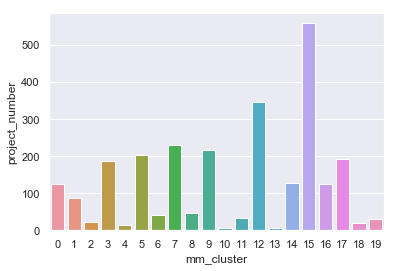

In [25]:
# projects per cluster
sns.barplot(x="mm_cluster", y="project_number", data=kmm_proj)

In [26]:
# Number of micromarkets in each micromarket cluster
kmm_micro=mm_proj.groupby('mm_cluster')['micro_market_number'].count().reset_index()
kmm_micro=pd.DataFrame(kmm_micro)
kmm_micro

,mm_cluster,micro_market_number
0,0,6
1,1,5
2,2,2
3,3,6
4,4,2
5,5,9
6,6,3
7,7,4
8,8,5
9,9,9


In [27]:
year_mm_price=df1.groupby(['launch_year','mm_cluster'])['wap'].mean()
year_mm_price=pd.DataFrame(year_mm_price)

mean_wap_by_year=pd.concat([year_mm_price.loc[(2014)],year_mm_price.loc[(2015)],year_mm_price.loc[(2016)],year_mm_price.loc[(2017)],year_mm_price.loc[(2018)]],axis=1)
mean_wap_by_year.columns=['meanwap_2014','meanwap_2015','meanwap_2016','meanwap_2017','meanwap_2018']
mean_wap_by_year

,meanwap_2014,meanwap_2015,meanwap_2016,meanwap_2017,meanwap_2018
mm_cluster,,,,,
0,7241.750000,7190.230312,6923.446786,7284.184616,8434.699402
1,18810.414848,18559.228895,20928.727273,24918.370369,22168.930147
2,34678.250000,34907.799386,33380.333333,32685.333333,NaN
3,15442.331257,16442.129733,17007.092950,16575.809007,16303.168677
4,41070.750000,52483.166667,64374.666667,15714.000000,NaN
5,4103.807960,4034.626387,4166.287660,4653.439452,4005.434851
6,35808.407242,42769.880344,38872.774000,35593.090909,NaN
7,9485.603483,11429.214727,9672.252469,9846.522545,11802.490393
8,28082.162960,26854.000000,28538.773155,27601.714286,NaN


In [28]:
from scipy.stats import spearmanr

rho, pval = spearmanr(mean_wap_by_year,nan_policy='omit')
rho = pd.DataFrame(rho)
rho.index=['meanwap_2014','meanwap_2015','meanwap_2016','meanwap_2017','meanwap_2018']
rho.columns=['meanwap_2014','meanwap_2015','meanwap_2016','meanwap_2017','meanwap_2018']
rho

,meanwap_2014,meanwap_2015,meanwap_2016,meanwap_2017,meanwap_2018
meanwap_2014,1.000000,0.998246,1.000000,0.923633,1.000000
meanwap_2015,0.998246,1.000000,0.996992,0.908772,1.000000
meanwap_2016,1.000000,0.996992,1.000000,0.914035,1.000000
meanwap_2017,0.923633,0.908772,0.914035,1.000000,0.994505
meanwap_2018,1.000000,1.000000,1.000000,0.994505,1.000000


The micromarket clusters are stable given the high value of Spearman correlation coefficients.

###  2.2 Clustering Developers

In [29]:
devn_prices=df1.groupby('developer_number')['wap'].mean()
devn_prices

developer_number
1       14464.000000
10      12610.000000
100     15750.000000
1000     3000.000000
1002     4500.000000
1003     4171.000000
1004     4500.000000
1006     5650.000000
1007     5662.000000
1008     5657.580600
101     18500.000000
1011     9642.000000
1012     5000.000000
1014    10850.000000
1017     4751.106867
1018     7500.000000
1019     9160.000000
102      8949.836325
1020     7857.000000
1021     4609.000000
1023     4875.000000
1025     4532.000000
1026     5303.000000
1029     3958.500000
1030     5006.879833
1031    10000.000000
1032     3999.000000
1033     4753.500000
1035     4821.884067
1037     4408.000000
            ...     
947      3104.000000
949      3750.000000
952      5107.000000
956      2900.000000
957      3578.000000
959      3250.000000
96      16465.620000
960     10791.333333
962      4500.000000
963      3400.000000
965      5178.000000
967      5100.000000
968      3750.000000
970      4000.000000
971     12330.000000
972      4339.000

The number of developers is too large to be used as a variable for regression model. Let's cluster developers in terms of prices. Let us try agglomerative clustering this time.

In [30]:
devn_prices.shape

(1504,)

In [31]:
devn=devn_prices.values # Reshape the array consisting of data with one feature into one column only 
devn=devn.reshape(-1, 1)
devn.shape

(1504, 1)

[Text(0, 0.5, 'Inter-cluster distance'), Text(0.5, 1.0, 'Dendrogram')]

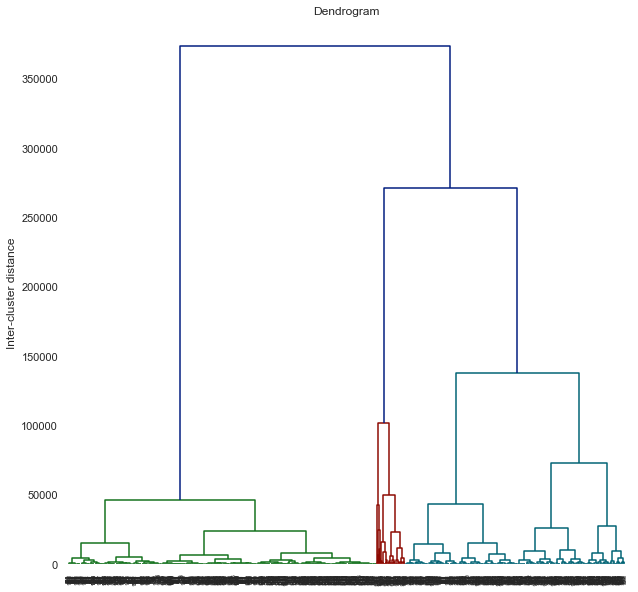

In [32]:
# for visualisation for hierarchal cluster linkage
from scipy.cluster.hierarchy import dendrogram, linkage

links = linkage(devn, method='ward', metric='euclidean')

fig, ax = plt.subplots(figsize=(10, 10))
dendrogram(links, ax=ax)

ax.set(title='Dendrogram', ylabel='Inter-cluster distance')

In [33]:
from sklearn.cluster import AgglomerativeClustering

agg = AgglomerativeClustering(n_clusters=20,linkage='ward')
clusters_agg = agg.fit_predict(devn)

print("Silhoutte Score of Developer Clusters:", silhouette_score(devn, clusters_agg))

Silhoutte Score of Developer Clusters: 0.555104813995452


In [34]:
#cluster dataframe
clusters_agg =pd.DataFrame(clusters_agg)
clusters_agg .columns=['dev_cluster']

#cluster number and number of projects for every micromarket
dev_proj=df1.groupby('developer_number')['project_number'].count().reset_index()
dev_proj=pd.concat([dev_proj, clusters_agg ],axis=1)
dev_proj

,developer_number,project_number,dev_cluster
0,1,1,16
1,10,1,3
2,100,2,11
3,1000,1,4
4,1002,1,13
5,1003,1,13
6,1004,1,13
7,1006,1,8
8,1007,1,8
9,1008,1,8


In [35]:
# Dictionary mapping micromarket number with cluster numbers
dev_cluster = dict(zip(dev_proj['developer_number'], dev_proj['dev_cluster']))

In [36]:
# Create a new column in the dataset indicating cluster numbers, initialised with micromarket numbers
df1['dev_cluster']=df1['developer_number']
# Map cluster numbers to their respective micromarket numbers 
df1['dev_cluster']=df1['dev_cluster'].map(dev_cluster)
print('value counts of developer clusters')
df1['dev_cluster'].value_counts()

value counts of developer clusters


4     491
13    412
8     246
11    198
6     190
3     181
17    172
18    154
2     147
16    138
10    125
5      74
14     24
7      21
9      16
1      16
12      6
15      6
0       3
19      1
Name: dev_cluster, dtype: int64

The frequency counts of projects in certain developer clusters are low. Let us merge cluster 0, 12 and 19 with cluster 15.

In [37]:
df1['dev_cluster']=df1['dev_cluster'].replace([19,0,12],[15,15,15])
df1['dev_cluster'].value_counts()

4     491
13    412
8     246
11    198
6     190
3     181
17    172
18    154
2     147
16    138
10    125
5      74
14     24
7      21
15     16
9      16
1      16
Name: dev_cluster, dtype: int64

In [38]:
# How many projects are there for each cluster?
clusters_agg_proj=df1.groupby('dev_cluster')['project_number'].count().reset_index()
clusters_agg_proj=pd.DataFrame(clusters_agg_proj)
clusters_agg_proj

,dev_cluster,project_number
0,1,16
1,2,147
2,3,181
3,4,491
4,5,74
5,6,190
6,7,21
7,8,246
8,9,16
9,10,125


Let's check if clusters for developers are stable or not with the help of spearman's correlation ranking just like mm clusters.

In [39]:
year_dev_price=df1.groupby(['launch_year','dev_cluster'])['wap'].mean()
year_dev_price=pd.DataFrame(year_dev_price)

meanwap_dev_year=pd.concat([year_dev_price.loc[(2014)],year_dev_price.loc[(2015)],year_dev_price.loc[(2016)],year_dev_price.loc[(2017)],year_dev_price.loc[(2018)]],axis=1)
meanwap_dev_year.columns=['dev_meanwap_2014','dev_meanwap_2015','dev_meanwap_2016','dev_meanwap_2017','dev_meanwap_2018']
meanwap_dev_year

,dev_meanwap_2014,dev_meanwap_2015,dev_meanwap_2016,dev_meanwap_2017,dev_meanwap_2018
dev_cluster,,,,,
1,34523.333333,44083.666667,40356.500000,40475.666667,NaN
2,18618.484114,18223.293813,18663.114653,18450.660030,20253.878408
3,11923.177869,12458.979720,11422.621458,13092.890102,14102.444744
4,2972.444447,2980.337878,2943.888492,3049.169011,3029.044720
5,28869.048530,21245.646832,24528.580973,26155.944973,19951.965000
6,7893.894020,9205.310800,8838.696505,9658.908851,9393.874232
7,27741.400000,27022.050000,33676.956667,29428.200000,NaN
8,5284.542853,5331.455128,5547.145254,5658.106230,5754.399869
9,NaN,34352.000000,31200.978333,32499.250000,NaN


In [40]:
from scipy.stats import spearmanr

rho1, pval1 = spearmanr(meanwap_dev_year, nan_policy='omit') # rho1 - correlation coefficient, p-val1 - p-value signifying monotonic relationship
rho1 = pd.DataFrame(rho1)
rho1.index=['dev_meanwap_2014','dev_meanwap_2015','dev_meanwap_2016','dev_meanwap_2017','dev_meanwap_2018']
rho1.columns=['dev_meanwap_2014','dev_meanwap_2015','dev_meanwap_2016','dev_meanwap_2017','dev_meanwap_2018']
rho1

,dev_meanwap_2014,dev_meanwap_2015,dev_meanwap_2016,dev_meanwap_2017,dev_meanwap_2018
dev_meanwap_2014,1.000000,0.988235,0.994118,0.991176,0.909091
dev_meanwap_2015,0.988235,1.000000,0.995098,0.995098,0.923077
dev_meanwap_2016,0.994118,0.995098,1.000000,0.995098,0.909091
dev_meanwap_2017,0.991176,0.995098,0.995098,1.000000,0.881119
dev_meanwap_2018,0.909091,0.923077,0.909091,0.881119,1.000000


Based on Spearman correlation coefficient values, clustering for developers highly stable stable, even more than that of micromarket clusters.

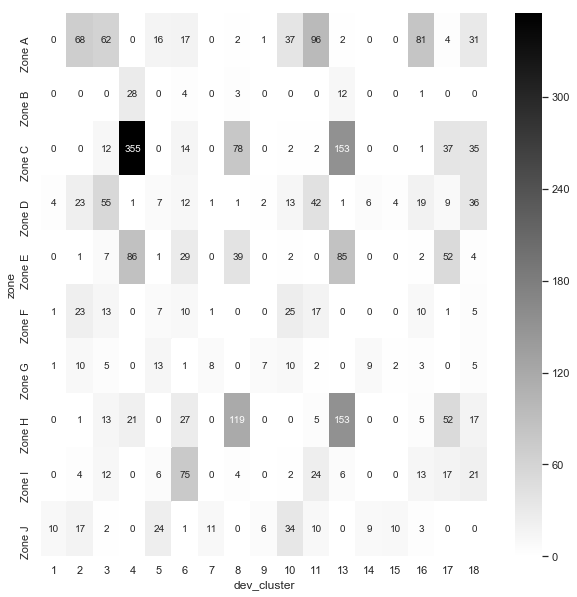

In [41]:
fig,ax=plt.subplots(figsize=(10,10))
fig=sns.heatmap(pd.crosstab(df1['zone'], df1['dev_cluster']),annot=True, fmt='d',cmap='binary')

Uneven frequency distributions of development clusters across zones. Zone C and zone H accomodates most of the projects of the clusters.

### 2.3 Overlaying Micromarket and Developer Clusters

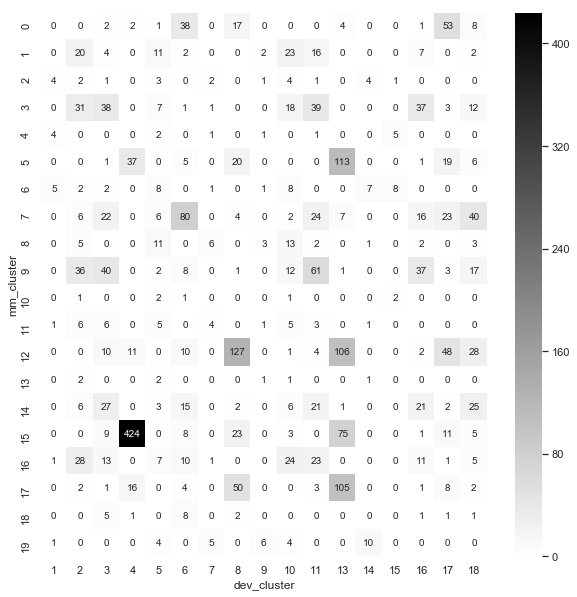

In [42]:
fig,ax=plt.subplots(figsize=(10,10))
fig=sns.heatmap(pd.crosstab(df1['mm_cluster'], df1['dev_cluster']),annot=True, fmt='d',cmap='binary')

There are many cells in the cross tab frequency table of micromarket cluster and developer cluster with zeroes and ones.
Both clusters together explain maximum variation in prices.
We shall explore again with better data with a greater number of projects.

###  2.4 Looking At Correlations Between Word Embeddings Continuous Variables

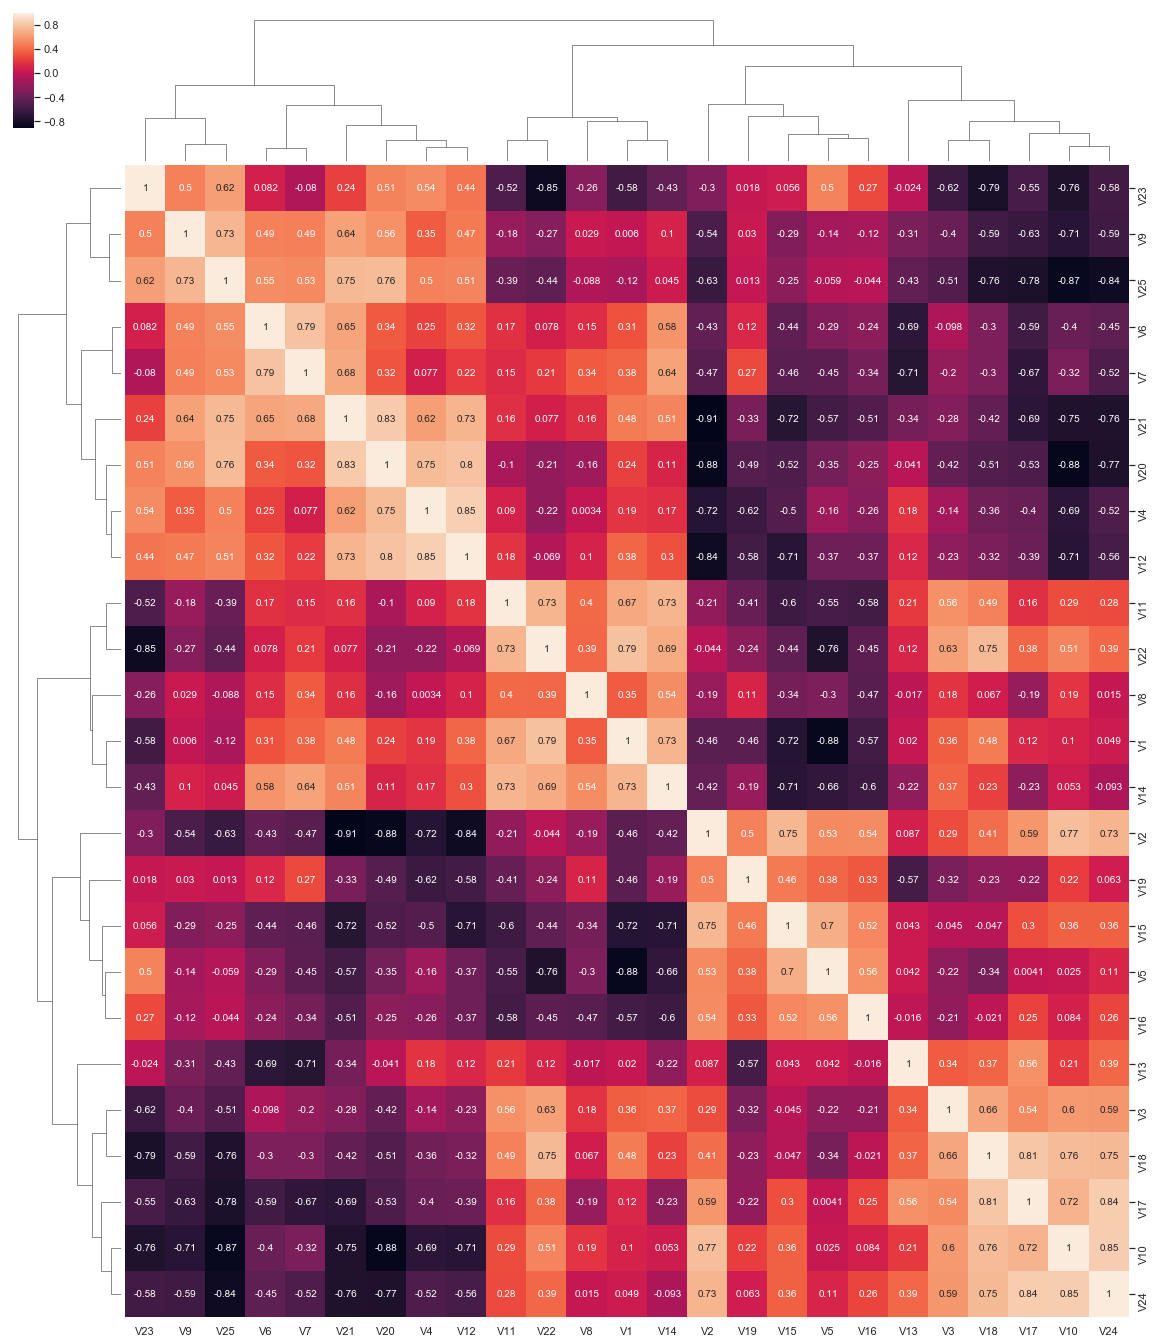

In [43]:
# Dendogram Linkage between continuous variables showing links based on correlation coefficients
sns.clustermap(pd.DataFrame(df1.loc[:,'V1':'V25']).corr(),annot=True, method='complete',figsize=(20, 24))

Based on clustermap, it is suggested that following variables should not be used together in regression:

1) V9 and V25

2) V6 and V7

3) V4 and V12

4) V11 and V22

5) V1 and V14

6) V5 and V16

7) V3 and V18

8) V10 and V24

In [44]:
def calculate_vif (inc, dataframe): # Function for calculating and returning VIF values
    from statsmodels.stats.outliers_influence import variance_inflation_factor
    from statsmodels.tools.tools import add_constant
    
    df_vif=dataframe[inc]
    df_vifx = add_constant(df_vif)
    print('--Calculated VIF values--')
    return (pd.Series([variance_inflation_factor(df_vifx.values, i) for i in range(df_vifx.shape[1])], index=df_vifx.columns))

In [45]:
include=list(df1.loc[:,'V1':'V25'])
calculate_vif (include, df1)

C:\Users\User\Anaconda3\envs\anirban\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


--Calculated VIF values--


const    11.061160
V1       16.276111
V2       35.742615
V3        5.886969
V4       10.097221
V5       12.720544
V6        6.987264
V7       14.762687
V8        3.866375
V9        4.633038
V10      52.346913
V11       9.601220
V12      13.100774
V13       7.794146
V14      12.688428
V15      10.552678
V16       4.936356
V17      23.588315
V18      13.935412
V19       9.781191
V20      35.438059
V21      57.255728
V22      24.142975
V23      26.708897
V24      12.709548
V25      22.332535
dtype: float64

Normally, VIF values greater than 5 is a concern for multicollinearity. The word embedding features, when used together, show high level of multicollinearity. It's up to our discretion which features should not be used together at a time and be dropped based on the values above.

## 3. Linear Regression Models with Word Embeddings

There are 4 possible models to be tried out.


### 3.1 Model 1

In [46]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

mod = smf.ols(formula='log_wap ~ C(mm_cluster) + C(dev_cluster) + b2 + b3 + b5 + bp1 + bp4 + V1 + V2 + V4 + V6 + V7 + V13 + V14 + V16 + V23 + V24', data=df1).fit()
print(mod.summary())

                            OLS Regression Results                            
Dep. Variable:                log_wap   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     882.2
Date:                Mon, 18 Mar 2019   Prob (F-statistic):               0.00
Time:                        21:03:12   Log-Likelihood:                 743.43
No. Observations:                2621   AIC:                            -1385.
Df Residuals:                    2570   BIC:                            -1085.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                9.5482 

Let us look at Variance Inflation Factors of the variables under consideration.

As mentioned by others and in this post at https://github.com/statsmodels/statsmodels/issues/2376 by Josef Perktold, the function's author, variance_inflation_factor expects the presence of a constant in the matrix of explanatory variables. One can use add_constant from statsmodels to add the required constant to the dataframe before passing its values to the function

In [47]:
include=['mm_cluster','dev_cluster','b2','b3','b5','bp1','bp4','V1','V2','V4','V6','V7','V13','V14','V16','V23','V24']
calculate_vif (include, df1)

--Calculated VIF values--


C:\Users\User\Anaconda3\envs\anirban\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const          21.092570
mm_cluster      1.091768
dev_cluster     1.045319
b2              1.204303
b3              1.143871
b5              1.034636
bp1             1.297744
bp4             1.122348
V1              6.642631
V2              8.707011
V4              4.441457
V6              4.803164
V7              6.863787
V13             4.305731
V14             5.079227
V16             2.379406
V23             7.519502
V24             6.463646
dtype: float64

Good to note that micromarket and developer clusters are not correlated.

In [48]:
def residual_log (model, dataframe, residual_log, residual):
    # Function To Compute and return residual summary statistics for a model
    predicted_lwap = model.predict()
    predicted_wap=np.exp(predicted_lwap)
    dataframe[residual_log]=dataframe['log_wap'] - predicted_lwap
    dataframe[residual]=dataframe['wap'] - predicted_wap
    return (print(dataframe[residual_log].describe()),print ('median:  ',dataframe[residual_log].median()))

In [49]:
residual_log (mod, df1, 'residual_log_mod','residual_mod') # Residual summmary statistics for model 1

count    2.621000e+03
mean     4.326015e-14
std      1.822470e-01
min     -1.045034e+00
25%     -9.953771e-02
50%      1.313921e-03
75%      1.003043e-01
max      1.003550e+00
Name: residual_log_mod, dtype: float64
median:   0.00131392087089921


(None, None)

In [50]:
def percentage_error_projects (dataframe, residual, percentage_error,percentage_error_interval):
    #Calculate percentage error w.r.t wap
    dataframe[percentage_error]=(dataframe[residual]/dataframe['wap'])*100
    #Split percentage error into equal intervals
    dataframe[percentage_error_interval] = pd.cut(dataframe[percentage_error], bins=[-float("inf"),-30,-20,-10,0,10,20,30,float("inf")])
    # How many projects in each interval of wap?
    grouped_df = dataframe.groupby(percentage_error_interval)['project_number'].count().reset_index()
    # Percentage of projects under each interval
    grouped_df['percentage_projects']=(grouped_df['project_number']/grouped_df['project_number'].sum())*100
    return (grouped_df)    

In [51]:
percentage_error_projects (df1, 'residual_mod', 'percentage_error_mod','percentage_error_mod_interval') # Model 1

,percentage_error_mod_interval,project_number,percentage_projects
0,"(-inf, -30.0]",168,6.409767
1,"(-30.0, -20.0]",156,5.951927
2,"(-20.0, -10.0]",356,13.582602
3,"(-10.0, 0.0]",624,23.807707
4,"(0.0, 10.0]",695,26.516597
5,"(10.0, 20.0]",398,15.185044
6,"(20.0, 30.0]",157,5.990080
7,"(30.0, inf]",67,2.556276


In [52]:
# Mean Absolute Percentage Error of model 1
np.absolute(df1['percentage_error_mod']).mean()

13.672969258193831

In [53]:
# Split up wap into intervals
df1['wap_interval'] = pd.cut(df1['wap'], bins=[0,5e+3,1e+4,3e+4,9e+4]) 
df1['wap_interval'].value_counts()

(0.0, 5000.0]         1017
(10000.0, 30000.0]     927
(5000.0, 10000.0]      565
(30000.0, 90000.0]     112
Name: wap_interval, dtype: int64

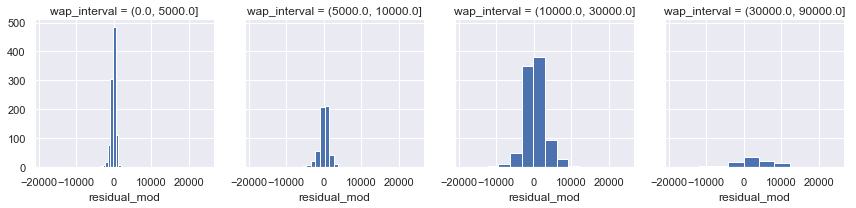

In [54]:
g = sns.FacetGrid(df1, col="wap_interval")
g = g.map(plt.hist, "residual_mod")

Now let's try the second model.

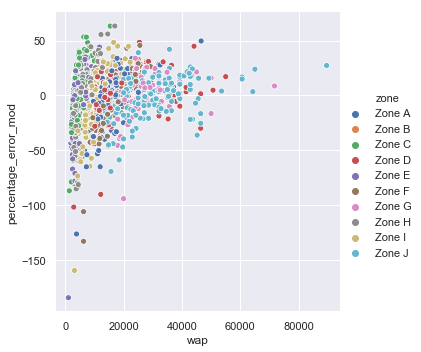

In [55]:
sns.relplot(x="wap", y="percentage_error_mod", hue="zone", data=df1)

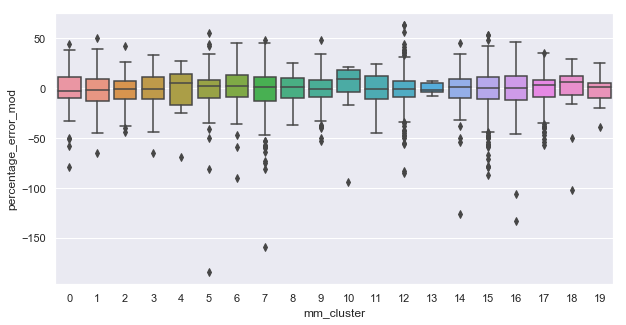

In [56]:
f, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="mm_cluster", y="percentage_error_mod", data=df1)

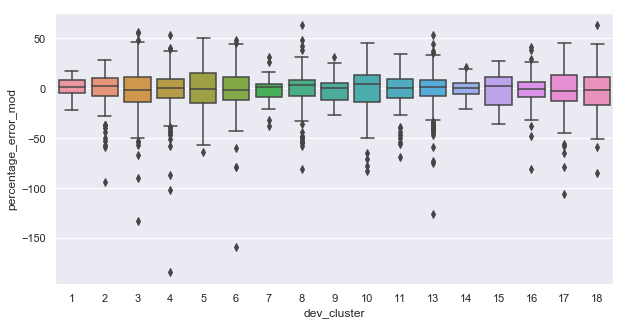

In [57]:
f, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="dev_cluster", y="percentage_error_mod", data=df1)

### 3.2 Model 2

In [58]:
mod2 = smf.ols(formula='log_wap ~ C(mm_cluster) + C(dev_cluster) + b2 + b3 + b5 + bp1 + bp4 + C(construction_status)', data=df1).fit()
print(mod2.summary())

                            OLS Regression Results                            
Dep. Variable:                log_wap   R-squared:                       0.944
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     1037.
Date:                Mon, 18 Mar 2019   Prob (F-statistic):               0.00
Time:                        21:03:15   Log-Likelihood:                 723.83
No. Observations:                2621   AIC:                            -1362.
Df Residuals:                    2578   BIC:                            -1109.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [59]:
def label_encoder(dataframe, col_name): # Function for label encoding categorical variables
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    le.fit(dataframe[col_name].unique())
    dataframe[col_name] = le.transform(dataframe[col_name])

In [60]:
include=['mm_cluster','dev_cluster','b2','b3','b5','bp1','bp4','construction_status']
sel=pd.DataFrame(df1[include])
label_encoder(sel, 'construction_status')
calculate_vif (include, sel)

--Calculated VIF values--


C:\Users\User\Anaconda3\envs\anirban\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const                  14.627425
mm_cluster              1.082550
dev_cluster             1.040992
b2                      1.187896
b3                      1.139865
b5                      1.033568
bp1                     1.264696
bp4                     1.108676
construction_status     1.028523
dtype: float64

In [61]:
residual_log (mod2, df1, 'residual_log_mod2','residual_mod2') # Residual summary statistics for model 2

count    2.621000e+03
mean     1.098346e-14
std      1.836153e-01
min     -1.078507e+00
25%     -9.906742e-02
50%      3.407233e-03
75%      1.015341e-01
max      1.030156e+00
Name: residual_log_mod2, dtype: float64
median:   0.0034072332280921103


(None, None)

In [62]:
percentage_error_projects (df1, 'residual_mod2', 'percentage_error_mod2','percentage_error_mod2_interval') # Model 2

,percentage_error_mod2_interval,project_number,percentage_projects
0,"(-inf, -30.0]",172,6.562381
1,"(-30.0, -20.0]",171,6.524227
2,"(-20.0, -10.0]",335,12.781381
3,"(-10.0, 0.0]",606,23.120946
4,"(0.0, 10.0]",702,26.783670
5,"(10.0, 20.0]",406,15.490271
6,"(20.0, 30.0]",159,6.066387
7,"(30.0, inf]",70,2.670736


In [63]:
# Mean Absolute Percentage Error of model 2
np.absolute(df1['percentage_error_mod2']).mean()

13.733171514367342

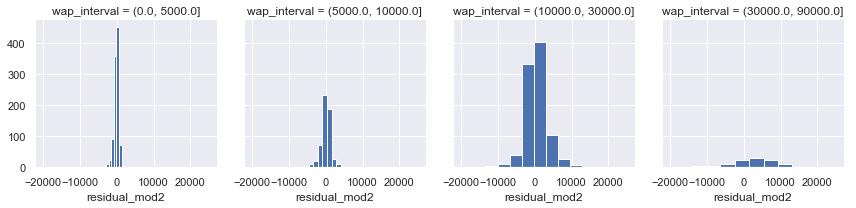

In [64]:
g = sns.FacetGrid(df1, col="wap_interval")
g = g.map(plt.hist, "residual_mod2")

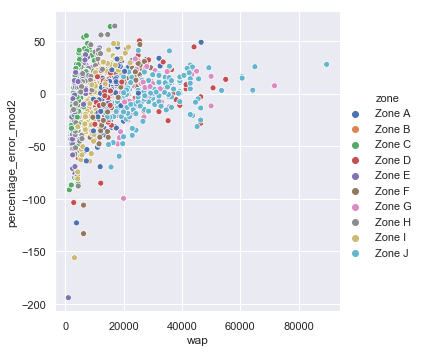

In [65]:
sns.relplot(x="wap", y="percentage_error_mod2", hue="zone", data=df1)

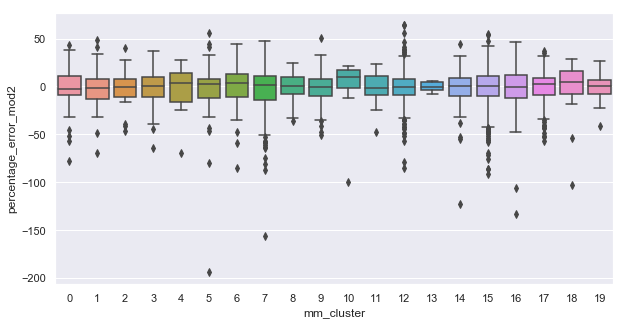

In [66]:
f, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="mm_cluster", y="percentage_error_mod2", data=df1)

### 3.3 Model 3

In [67]:
mod3 = smf.ols(formula='log_wap ~ C(mm_cluster) + b2 + b5 + bp1 + bp4 + bp58 + size_rv + V5 + V6 + V7 + V8 + V12 + V13 + V16 + V17 + V23 + V24 + V25', data=df1).fit()
print(mod3.summary())

                            OLS Regression Results                            
Dep. Variable:                log_wap   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     857.6
Date:                Mon, 18 Mar 2019   Prob (F-statistic):               0.00
Time:                        21:03:18   Log-Likelihood:                 299.99
No. Observations:                2621   AIC:                            -526.0
Df Residuals:                    2584   BIC:                            -308.7
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.9244    

In [68]:
include=['mm_cluster','b2','b5','bp1','bp4','bp58','size_rv','V5','V6','V7','V8','V12','V13','V16','V17','V23','V24','V25']
calculate_vif (include, df1)

--Calculated VIF values--


C:\Users\User\Anaconda3\envs\anirban\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const         17.728979
mm_cluster     1.070710
b2             1.158618
b5             1.915139
bp1            1.263672
bp4            1.124548
bp58           1.913298
size_rv        1.037091
V5             4.750612
V6             4.283376
V7             8.799693
V8             1.827563
V12            4.710232
V13            4.128755
V16            2.874632
V17           11.149439
V23           11.316344
V24            7.241754
V25            5.913843
dtype: float64

In [69]:
print(residual_log (mod3, df1, 'residual_log_mod3','residual_mod3')) # Residual summary statistics for model 3

count    2.621000e+03
mean     1.158071e-13
std      2.158432e-01
min     -1.198906e+00
25%     -1.273301e-01
50%      1.472302e-03
75%      1.233548e-01
max      1.186073e+00
Name: residual_log_mod3, dtype: float64
median:   0.0014723017869791022
(None, None)


In [70]:
percentage_error_projects (df1, 'residual_mod3', 'percentage_error_mod3','percentage_error_mod3_interval') # Model 3

,percentage_error_mod3_interval,project_number,percentage_projects
0,"(-inf, -30.0]",239,9.118657
1,"(-30.0, -20.0]",201,7.668829
2,"(-20.0, -10.0]",350,13.353682
3,"(-10.0, 0.0]",515,19.648989
4,"(0.0, 10.0]",588,22.434185
5,"(10.0, 20.0]",420,16.024418
6,"(20.0, 30.0]",197,7.516215
7,"(30.0, inf]",111,4.235025


In [71]:
# Mean Absolute Percentage Error of model 3
np.absolute(df1['percentage_error_mod3']).mean()

16.292461675844905

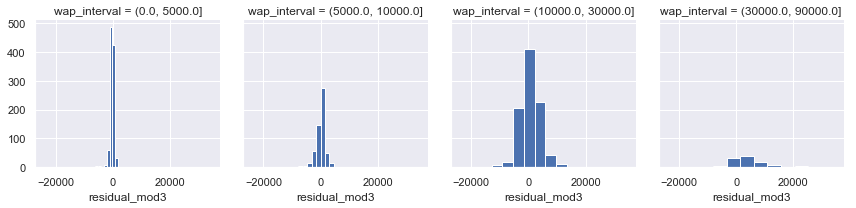

In [72]:
g = sns.FacetGrid(df1, col="wap_interval")
g = g.map(plt.hist, "residual_mod3")

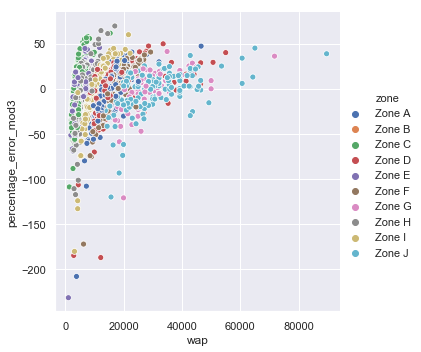

In [73]:
sns.relplot(x="wap", y="percentage_error_mod3", hue="zone", data=df1)

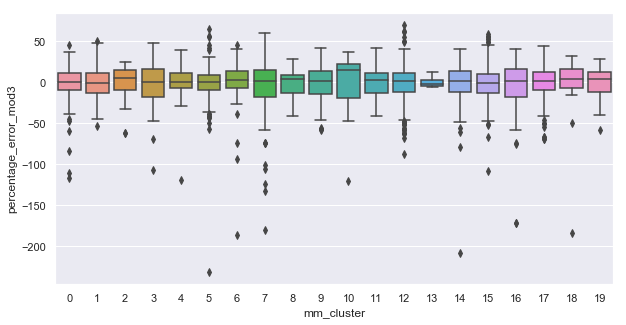

In [74]:
f, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="mm_cluster", y="percentage_error_mod3", data=df1)

### 3.4 Model 4

In [75]:
mod4 = smf.ols(formula='log_wap ~ C(mm_cluster) + C(dev_cluster) + b2 + bp1 + bp3 + bp4 + bp58 + size_rv + V4 + V5 + V6 + V7 + V8 + V12 + V13 + V16 + V17 + V23 + V24', data=df1).fit()
print(mod4.summary())

                            OLS Regression Results                            
Dep. Variable:                log_wap   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.944
Method:                 Least Squares   F-statistic:                     856.5
Date:                Mon, 18 Mar 2019   Prob (F-statistic):               0.00
Time:                        21:03:20   Log-Likelihood:                 756.40
No. Observations:                2621   AIC:                            -1407.
Df Residuals:                    2568   BIC:                            -1096.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                9.5077 

In [76]:
include=['mm_cluster','dev_cluster','b2','bp1','bp3','bp4','bp58','size_rv','V4','V5','V6','V7','V8','V12','V13','V16','V17','V23','V24']
calculate_vif (include, df1)

--Calculated VIF values--


C:\Users\User\Anaconda3\envs\anirban\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


const          24.873349
mm_cluster      1.093303
dev_cluster     1.045156
b2              1.229307
bp1             1.928077
bp3             1.620488
bp4             1.126126
bp58            1.045574
size_rv         1.035842
V4              5.075888
V5              4.515309
V6              4.422021
V7              9.086995
V8              1.837815
V12             7.382512
V13             4.422937
V16             2.768787
V17            12.065812
V23            10.227350
V24             5.823262
dtype: float64

In [77]:
print(residual_log (mod4, df1, 'residual_log_mod4','residual_mod4')) # Residual summary statistics for model 4

count    2.621000e+03
mean     1.144527e-13
std      1.813477e-01
min     -1.045954e+00
25%     -1.012554e-01
50%      4.223714e-03
75%      9.899466e-02
max      9.900227e-01
Name: residual_log_mod4, dtype: float64
median:   0.004223714142685964
(None, None)


In [78]:
percentage_error_projects (df1, 'residual_mod4', 'percentage_error_mod4','percentage_error_mod4_interval') # Model 3

,percentage_error_mod4_interval,project_number,percentage_projects
0,"(-inf, -30.0]",169,6.447921
1,"(-30.0, -20.0]",150,5.723006
2,"(-20.0, -10.0]",371,14.154903
3,"(-10.0, 0.0]",595,22.701259
4,"(0.0, 10.0]",715,27.279664
5,"(10.0, 20.0]",395,15.070584
6,"(20.0, 30.0]",160,6.104540
7,"(30.0, inf]",66,2.518123


In [79]:
# Mean Absolute Percentage Error of model 4
np.absolute(df1['percentage_error_mod4']).mean()

13.599602714381053

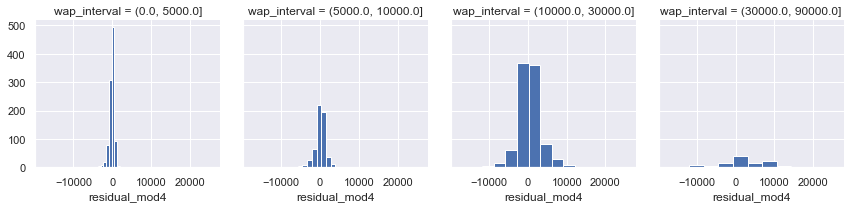

In [80]:
g = sns.FacetGrid(df1, col="wap_interval")
g = g.map(plt.hist, "residual_mod4")

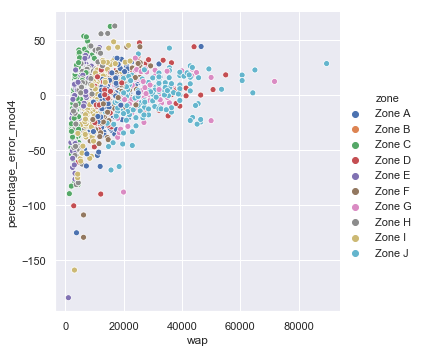

In [81]:
sns.relplot(x="wap", y="percentage_error_mod4", hue="zone", data=df1)

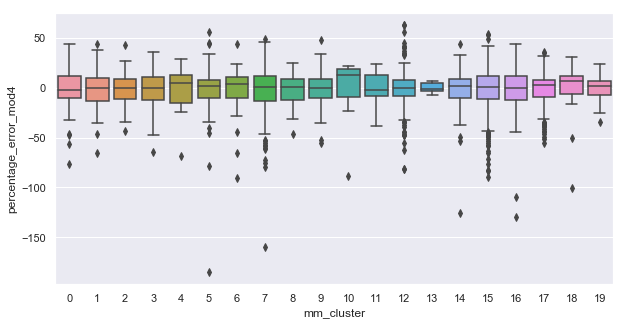

In [82]:
f, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="mm_cluster", y="percentage_error_mod4", data=df1)

## 4. Back-Testing

When we backtest a predictive model, we are testing how the model performs over a period of time. Model performance is know to degenerate over time.

Train data - entries for 2014, 2015 and 2016

Test data - entries for 2017, 2018

In [83]:
df1_train=pd.concat([df1.loc[(df1['launch_year'] == 2014), :],df1.loc[(df1['launch_year'] == 2015), :],df1.loc[(df1['launch_year'] == 2016), :]],axis=0)
df1_train.head(10)

,zone,micro_market_number,developer_number,project_number,wap,log_wap,proj_bedrooms_clean,unit_type,proj_launched_units,launch_year,...,percentage_error_mod2,percentage_error_mod2_interval,residual_log_mod3,residual_mod3,percentage_error_mod3,percentage_error_mod3_interval,residual_log_mod4,residual_mod4,percentage_error_mod4,percentage_error_mod4_interval
1,Zone A,1,2,2,13982.0000,9.545526,2 and more,Apartment,150,2014,...,-10.322027,"(-20.0, -10.0]",-0.142103,-2134.981256,-15.269498,"(-20.0, -10.0]",-0.095573,-1402.246598,-10.028941,"(-20.0, -10.0]"
2,Zone A,1,2,3,13982.0000,9.545526,2 and more,Apartment,150,2014,...,-10.322027,"(-20.0, -10.0]",-0.124769,-1858.021159,-13.288665,"(-20.0, -10.0]",-0.083134,-1212.060820,-8.668723,"(-10.0, 0.0]"
5,Zone A,1,8,9,12000.0000,9.392662,2 and more,Apartment,78,2014,...,-16.847832,"(-20.0, -10.0]",-0.351177,-5048.864740,-42.073873,"(-inf, -30.0]",-0.189503,-2503.788958,-20.864908,"(-30.0, -20.0]"
7,Zone A,1,13,16,18500.0000,9.825526,1 and more,Apartment,35,2014,...,13.526837,"(10.0, 20.0]",0.291475,4677.525440,25.283921,"(20.0, 30.0]",0.140265,2421.128702,13.087182,"(10.0, 20.0]"
9,Zone A,1,15,18,13750.0000,9.528794,1 and more,Apartment,54,2014,...,-4.538919,"(-10.0, 0.0]",-0.043828,-616.030050,-4.480219,"(-10.0, 0.0]",-0.034595,-484.008453,-3.520061,"(-10.0, 0.0]"
10,Zone A,1,15,19,14000.0000,9.546813,1 and more,Apartment,140,2014,...,-2.945334,"(-10.0, 0.0]",-0.045599,-653.165228,-4.665466,"(-10.0, 0.0]",-0.024867,-352.497536,-2.517840,"(-10.0, 0.0]"
12,Zone A,1,22,27,11500.0000,9.350102,1 and more,Apartment,146,2014,...,-23.271461,"(-30.0, -20.0]",-0.211372,-2706.770873,-23.537138,"(-30.0, -20.0]",-0.164584,-2057.381358,-17.890273,"(-20.0, -10.0]"
18,Zone A,1,31,44,14043.2471,9.549897,1 and more,Apartment,595,2014,...,-19.994571,"(-20.0, -10.0]",-0.093915,-1382.792653,-9.846673,"(-10.0, 0.0]",-0.215078,-3369.796328,-23.995849,"(-30.0, -20.0]"
22,Zone A,1,37,53,12500.0000,9.433484,1 and more,Apartment,105,2014,...,-3.612013,"(-10.0, 0.0]",-0.165289,-2246.678724,-17.973430,"(-20.0, -10.0]",-0.065200,-842.157294,-6.737258,"(-10.0, 0.0]"
23,Zone A,1,38,54,12351.6364,9.421544,1 and more,Apartment,99,2014,...,-12.268646,"(-20.0, -10.0]",-0.263966,-3731.223591,-30.208334,"(-inf, -30.0]",-0.150026,-1999.283885,-16.186389,"(-20.0, -10.0]"


In [84]:
df1_test=pd.concat([df1.loc[(df1['launch_year'] == 2017), :],df1.loc[(df1['launch_year'] == 2018), :]],axis=0)
df1_test.head(10)

,zone,micro_market_number,developer_number,project_number,wap,log_wap,proj_bedrooms_clean,unit_type,proj_launched_units,launch_year,...,percentage_error_mod2,percentage_error_mod2_interval,residual_log_mod3,residual_mod3,percentage_error_mod3,percentage_error_mod3_interval,residual_log_mod4,residual_mod4,percentage_error_mod4,percentage_error_mod4_interval
6,Zone A,1,9,10,13885.0000,9.538564,1 and more,Apartment,46,2017,...,-0.459966,"(-10.0, 0.0]",0.020551,282.434105,2.034095,"(0.0, 10.0]",-0.015892,-222.420023,-1.601873,"(-10.0, 0.0]"
16,Zone A,1,28,35,14502.0000,9.582042,2 and more,Apartment,87,2017,...,4.218852,"(0.0, 10.0]",-0.166861,-2633.421427,-18.159022,"(-20.0, -10.0]",-0.008547,-124.478681,-0.858355,"(-10.0, 0.0]"
17,Zone A,1,28,36,14502.0000,9.582042,2 and more,Apartment,77,2017,...,3.971596,"(0.0, 10.0]",-0.190383,-3041.256535,-20.971290,"(-30.0, -20.0]",-0.004935,-71.745867,-0.494731,"(-10.0, 0.0]"
20,Zone A,1,35,50,14464.0000,9.579418,2 and more,Apartment,36,2017,...,1.054694,"(0.0, 10.0]",-0.143722,-2235.595082,-15.456271,"(-20.0, -10.0]",0.001881,27.178027,0.187901,"(0.0, 10.0]"
21,Zone A,1,35,51,14464.0000,9.579418,2 and more,Apartment,36,2017,...,1.054694,"(0.0, 10.0]",-0.129102,-1993.222243,-13.780574,"(-20.0, -10.0]",0.053437,752.629818,5.203469,"(0.0, 10.0]"
34,Zone A,1,59,86,18041.7021,9.800441,1 and more,Apartment,423,2017,...,10.673382,"(10.0, 20.0]",0.226369,3654.817336,20.257608,"(20.0, 30.0]",0.111868,1909.499847,10.583812,"(10.0, 20.0]"
41,Zone A,1,69,98,20177.0000,9.912299,1 and more,Apartment,430,2017,...,20.714006,"(20.0, 30.0]",0.449570,7306.045159,36.209769,"(30.0, inf]",0.278203,4900.116356,24.285654,"(20.0, 30.0]"
43,Zone A,1,71,102,17678.0000,9.780076,1 and more,Apartment,25,2017,...,5.927830,"(0.0, 10.0]",0.171908,2792.123581,15.794341,"(10.0, 20.0]",0.048817,842.264207,4.764477,"(0.0, 10.0]"
54,Zone A,2,96,135,25000.0000,10.126631,3 and more,Apartment,93,2017,...,15.229099,"(10.0, 20.0]",0.103247,2452.391642,9.809567,"(0.0, 10.0]",0.120099,2829.193860,11.316775,"(10.0, 20.0]"
57,Zone A,2,101,141,18500.0000,9.825526,1 and more,Apartment,154,2017,...,-2.045570,"(-10.0, 0.0]",0.020835,381.457725,2.061934,"(0.0, 10.0]",-0.004696,-87.072831,-0.470664,"(-10.0, 0.0]"


Let's backtest the models we worked with earlier individually.

#### 4.1 Backtesting model 1

In [85]:
backt = smf.ols(formula='log_wap ~ C(mm_cluster) + C(dev_cluster) + b2 + b3 + b5 + bp1 + bp4 + V1 + V2 + V4 + V6 + V7 + V13 + V14 + V16 + V23 + V24', data=df1_train).fit()
print(backt.summary())

                            OLS Regression Results                            
Dep. Variable:                log_wap   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     799.9
Date:                Mon, 18 Mar 2019   Prob (F-statistic):               0.00
Time:                        21:03:22   Log-Likelihood:                 733.05
No. Observations:                2009   AIC:                            -1364.
Df Residuals:                    1958   BIC:                            -1078.
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                9.4991 

Python's scikit-learn library's r2_score metric will be helpful for calculating R2 score regression metric by comparing 
values of two different datasets.

In [86]:
def model_R2 (model):
    from sklearn.metrics import r2_score
    
    y_pred=model.predict(df1_test)
    return (r2_score(df1_test['log_wap'], y_pred))

In [87]:
# R2 score of model 1 backtesting
print('R2 Score of Model 1:',model_R2 (backt))

R2 Score of Model 1: 0.9119568329382446


In [88]:
def residual_computation (model, dataframe, residual_log, residual):
    # Function To Compute and return residual summary statistics for a model
    predicted_lwap = model.predict(dataframe)
    predicted_wap=np.exp(predicted_lwap)
    dataframe[residual_log]=dataframe['log_wap'] - predicted_lwap
    dataframe[residual]=dataframe['wap'] - predicted_wap
    return (dataframe[residual_log].describe(), print ('median:  ',dataframe[residual_log].median()))

In [89]:
# Residual summary statistics of model 1 backtesting
residual_computation (backt, df1_test, 'residual_log_backt', 'residual_backt') 

median:   0.051749997610758935


(count    612.000000
 mean       0.054601
 std        0.222924
 min       -1.052536
 25%       -0.056756
 50%        0.051750
 75%        0.166468
 max        1.064244
 Name: residual_log_backt, dtype: float64, None)

In [90]:
# Percentage Error vs projects for model 1 backtesting
percentage_error_projects (df1_test, 'residual_backt', 'percentage_error_backt','percentage_error_backt_interval') 

,percentage_error_backt_interval,project_number,percentage_projects
0,"(-inf, -30.0]",31,5.065359
1,"(-30.0, -20.0]",35,5.718954
2,"(-20.0, -10.0]",53,8.660131
3,"(-10.0, 0.0]",113,18.464052
4,"(0.0, 10.0]",156,25.490196
5,"(10.0, 20.0]",120,19.607843
6,"(20.0, 30.0]",66,10.784314
7,"(30.0, inf]",38,6.209150


In [91]:
# Mean Absolute Percentage Error of model 1 backtesting
np.absolute(df1_test['percentage_error_backt']).mean()

15.878434556957252

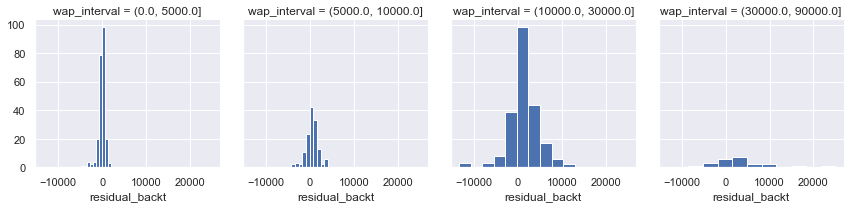

In [92]:
g = sns.FacetGrid(df1_test, col="wap_interval")
g = g.map(plt.hist, "residual_backt")

#### 4.2 Backtesting model 2

In [93]:
backt2 = smf.ols(formula='log_wap ~ C(mm_cluster) + C(dev_cluster) + b2 + b3 + b5 + bp1 + bp4 + C(construction_status)', data=df1_train).fit()
print(backt2.summary())

                            OLS Regression Results                            
Dep. Variable:                log_wap   R-squared:                       0.952
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     930.4
Date:                Mon, 18 Mar 2019   Prob (F-statistic):               0.00
Time:                        21:03:24   Log-Likelihood:                 706.90
No. Observations:                2009   AIC:                            -1328.
Df Residuals:                    1966   BIC:                            -1087.
Df Model:                          42                                         
Covariance Type:            nonrobust                                         
                                                   coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------

In [94]:
# R2 score of model 2 backtesting
print('R2 Score of Model 2:',model_R2 (backt2))

R2 Score of Model 2: 0.9131863461946423


In [95]:
# Residual summary statistics of model 2 backtesting
residual_computation (backt2, df1_test, 'residual_log_backt2', 'residual_backt2')

median:   0.0562730743277049


(count    612.000000
 mean       0.056953
 std        0.220673
 min       -1.096548
 25%       -0.053285
 50%        0.056273
 75%        0.170044
 max        1.091325
 Name: residual_log_backt2, dtype: float64, None)

In [96]:
# Percentage Error vs projects for model 2 backtesting
percentage_error_projects (df1_test, 'residual_backt2', 'percentage_error_backt2','percentage_error_backt2_interval') 

,percentage_error_backt2_interval,project_number,percentage_projects
0,"(-inf, -30.0]",29,4.738562
1,"(-30.0, -20.0]",32,5.228758
2,"(-20.0, -10.0]",53,8.660131
3,"(-10.0, 0.0]",107,17.483660
4,"(0.0, 10.0]",162,26.470588
5,"(10.0, 20.0]",122,19.934641
6,"(20.0, 30.0]",69,11.274510
7,"(30.0, inf]",38,6.209150


In [97]:
# Mean Absolute Percentage Error of model 2 backtesting
np.absolute(df1_test['percentage_error_backt2']).mean()

15.765720307758718

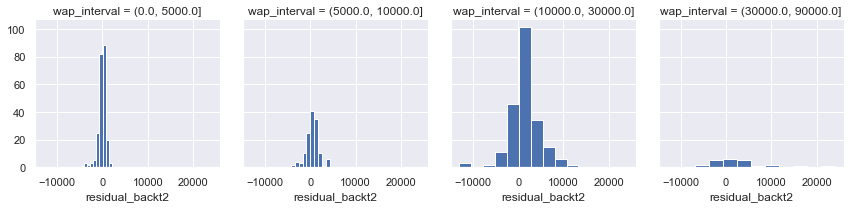

In [98]:
g = sns.FacetGrid(df1_test, col="wap_interval")
g = g.map(plt.hist, "residual_backt2")

#### 4.3  Backtesting Model 3

In [99]:
backt3 = smf.ols(formula='log_wap ~ C(mm_cluster) + b2 + b5 + bp1 + bp4 + bp58 + size_rv + V5 + V6 + V7 + V8 + V12 + V13 + V16 + V17 + V23 + V24 + V25', data=df1_train).fit()
print(backt3.summary())

                            OLS Regression Results                            
Dep. Variable:                log_wap   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     752.1
Date:                Mon, 18 Mar 2019   Prob (F-statistic):               0.00
Time:                        21:03:25   Log-Likelihood:                 356.62
No. Observations:                2009   AIC:                            -639.2
Df Residuals:                    1972   BIC:                            -431.8
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               8.9408    

In [100]:
# R2 score of model 3 backtesting
print('R2 Score of model 3:',model_R2 (backt3))

R2 Score of model 3: 0.8859998687032465


In [101]:
# Residual summary statistics of model 3 backtesting
residual_computation (backt3, df1_test, 'residual_log_backt3', 'residual_backt3')

median:   0.06654099771594346


(count    612.000000
 mean       0.065156
 std        0.252904
 min       -1.188392
 25%       -0.073433
 50%        0.066541
 75%        0.190988
 max        1.231372
 Name: residual_log_backt3, dtype: float64, None)

In [102]:
# Percentage Error vs projects for model 3 backtesting
percentage_error_projects (df1_test, 'residual_backt3', 'percentage_error_backt3','percentage_error_backt3_interval') 

,percentage_error_backt3_interval,project_number,percentage_projects
0,"(-inf, -30.0]",33,5.392157
1,"(-30.0, -20.0]",35,5.718954
2,"(-20.0, -10.0]",68,11.111111
3,"(-10.0, 0.0]",90,14.705882
4,"(0.0, 10.0]",126,20.588235
5,"(10.0, 20.0]",135,22.058824
6,"(20.0, 30.0]",71,11.601307
7,"(30.0, inf]",54,8.823529


In [103]:
# Mean Absolute Percentage Error of model 3 backtesting
np.absolute(df1_test['percentage_error_backt3']).mean()

18.3148893189882

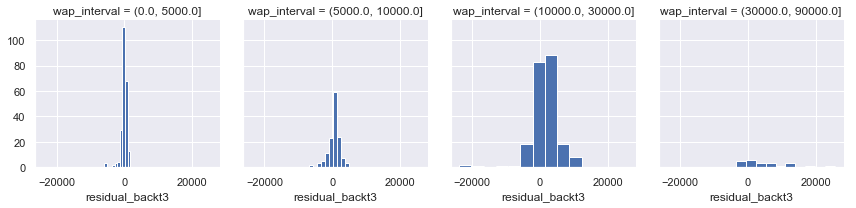

In [104]:
g = sns.FacetGrid(df1_test, col="wap_interval")
g = g.map(plt.hist, "residual_backt3")

#### 4.4 Backtesting Model 4

In [105]:
backt4 = smf.ols(formula='log_wap ~ C(mm_cluster) + C(dev_cluster) + b2 + bp1 + bp3 + bp4 + bp58 + size_rv + V4 + V5 + V6 + V7 + V8 + V12 + V13 + V16 + V17 + V23 + V24', data=df1_train).fit()
print(backt4.summary())

                            OLS Regression Results                            
Dep. Variable:                log_wap   R-squared:                       0.954
Model:                            OLS   Adj. R-squared:                  0.952
Method:                 Least Squares   F-statistic:                     773.2
Date:                Mon, 18 Mar 2019   Prob (F-statistic):               0.00
Time:                        21:03:27   Log-Likelihood:                 739.01
No. Observations:                2009   AIC:                            -1372.
Df Residuals:                    1956   BIC:                            -1075.
Df Model:                          52                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                9.4685 

In [106]:
# R2 score of model 4 backtesting
print('R2 Score of Model 4:',model_R2 (backt4))

R2 Score of Model 4: 0.913107617074316


In [107]:
# Residual summary statistics of model 4 backtesting
residual_computation (backt4, df1_test, 'residual_log_backt4', 'residual_backt4')

median:   0.054377156603174104


(count    612.000000
 mean       0.058165
 std        0.220463
 min       -1.054108
 25%       -0.048121
 50%        0.054377
 75%        0.166470
 max        1.059332
 Name: residual_log_backt4, dtype: float64, None)

In [108]:
# Percentage Error vs projects for model 4 backtesting
percentage_error_projects (df1_test, 'residual_backt4', 'percentage_error_backt4','percentage_error_backt4_interval') 

,percentage_error_backt4_interval,project_number,percentage_projects
0,"(-inf, -30.0]",31,5.065359
1,"(-30.0, -20.0]",21,3.431373
2,"(-20.0, -10.0]",67,10.947712
3,"(-10.0, 0.0]",95,15.522876
4,"(0.0, 10.0]",171,27.941176
5,"(10.0, 20.0]",126,20.588235
6,"(20.0, 30.0]",64,10.457516
7,"(30.0, inf]",37,6.045752


In [109]:
# Mean Absolute Percentage Error of model 4 backtesting
np.absolute(df1_test['percentage_error_backt4']).mean()

15.768345644544041

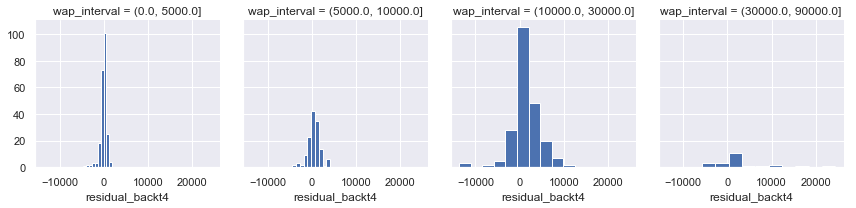

In [110]:
g = sns.FacetGrid(df1_test, col="wap_interval")
g = g.map(plt.hist, "residual_backt4")

Model 4 is finalised.

#### 4.4 Regression Diagnostics of Final Model

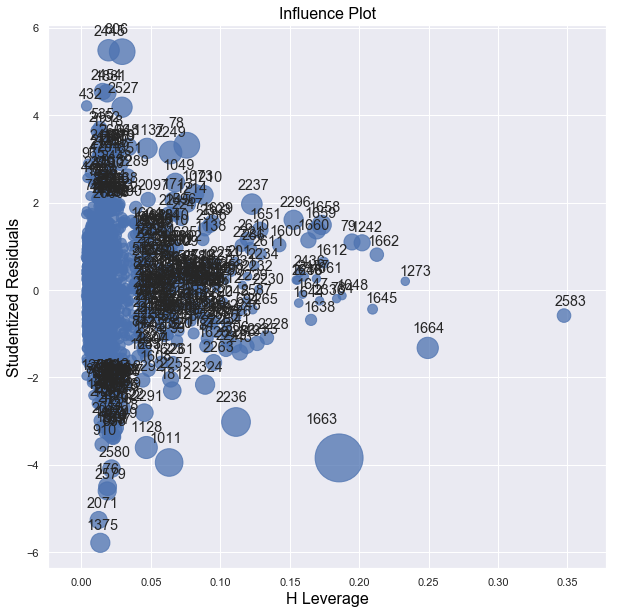

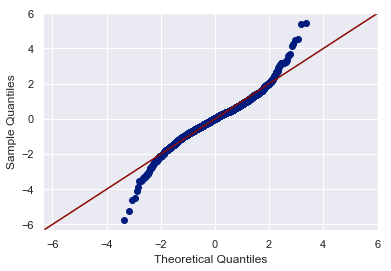

In [111]:
fig,ax=plt.subplots(figsize=(10,10))
#Cook's Distance Plot for final model
fig=sm.graphics.influence_plot(mod4, ax=ax, color='b')
#QQ Plot for log-residual of final model showing deviation from normal distribution
fig = sm.qqplot(df1['residual_log_mod4'], fit=True, line='45')
plt.show()

The influence plot indicates the level of influence far-off points (outliers and leverages) have on chosen regression model.
There is only one far off point and it has little influence on the model.
The qq plot shows that residuals fit a normal distribution well.
Residual diagnostics indicate that the final model chosen is robust.

## 5. Extreme Gradient Boost Regressor Using Final Model Features

In [112]:
include=['log_wap','mm_cluster','dev_cluster','b2','bp1','bp3','bp4','bp58','size_rv','V4','V5','V6','V7','V8','V12','V13','V16','V17','V23','V24']
df2=pd.DataFrame(df1[include])

df2.head()

,log_wap,mm_cluster,dev_cluster,b2,bp1,bp3,bp4,bp58,size_rv,V4,V5,V6,V7,V8,V12,V13,V16,V17,V23,V24
0,9.579418,3,16,5,0.954955,0.000000,0.0,0.0,1.383353,-0.067081,-0.185371,-0.032546,0.435810,0.264055,-0.116487,-0.252410,-0.422871,-0.789669,-0.131723,-0.580872
1,9.545526,3,16,98,0.000000,0.346667,0.0,0.0,0.372748,0.278550,-0.111899,0.312749,0.307807,-0.034639,0.294924,-0.167680,-0.056276,-0.577943,0.348402,-0.405855
2,9.545526,3,16,98,0.000000,0.346667,0.0,0.0,0.372748,0.282199,-0.090756,0.292134,0.288563,-0.021560,0.282619,-0.137335,-0.055074,-0.553753,0.379972,-0.367028
3,9.461644,3,3,13,0.891667,0.000000,0.0,0.0,1.187398,0.391827,-0.249752,0.281397,0.277463,0.051048,0.525415,-0.076936,-0.174178,-0.400852,0.150187,-0.344659
4,9.739884,3,11,22,0.030303,0.303030,0.0,0.0,1.519184,0.307399,-0.107702,0.292808,0.239444,-0.048153,0.321322,-0.099483,-0.063372,-0.468529,0.352715,-0.367375


In [113]:
from sklearn.model_selection import train_test_split

target = 'log_wap'
features = df2.columns != target
x = df2.loc[:,features]
y = df2[target]
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=8)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(1965, 19) (656, 19) (1965,) (656,)


In [114]:
import xgboost as xgb

xg_reg=xgb.XGBRegressor(base_score=0, objective='reg:linear',n_estimators=200,learning_rate=0.09,reg_alpha=5.5)
xg_reg.fit(x_train,y_train)

XGBRegressor(base_score=0, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.09, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=200,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=5.5, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [115]:
from sklearn.model_selection import cross_validate, GridSearchCV

# cross validate
scores_xgreg = cross_validate(xg_reg, x_train, y_train, cv=8,
                        return_train_score=True,
                        return_estimator=False)
scores_xgreg=pd.DataFrame(scores_xgreg)
scores_xgreg

,fit_time,score_time,test_score,train_score
0,0.295604,0.000000,0.905338,0.920791
1,0.397240,0.004031,0.880881,0.919966
2,0.350628,0.002029,0.910910,0.921075
3,0.253180,0.010044,0.898628,0.920353
4,0.261290,0.003996,0.912334,0.918461
5,0.277344,0.000000,0.898196,0.919040
6,0.250091,0.008156,0.908425,0.920065
7,0.296101,0.002077,0.882238,0.921121


In [116]:
print('Mean Test Score of XG Boost Regressor of final model: ', scores_xgreg['test_score'].mean())
print('Mean Train Score of XG Boost Regressor of final model: ', scores_xgreg['train_score'].mean())

Mean Test Score of XG Boost Regressor of final model:  0.8996185383284784
Mean Train Score of XG Boost Regressor of final model:  0.9201088088947769


In [117]:
def model_r2score (model, x_testdataframe, y_testdataframe):
    from sklearn.metrics import r2_score
    
    y_predicted_values=model.predict(x_testdataframe)
    return (r2_score(y_testdataframe, y_predicted_values))

In [118]:
print('R2 Score of XGBoost Regressor of Final Model:',model_r2score (xg_reg, x_test, y_test))

R2 Score of XGBoost Regressor of Final Model: 0.9110142725250148


In [119]:
def plot_feature_importances (model, kind, title, color, dataframe):
    importances = pd.Series(data=model.feature_importances_, index= dataframe.columns)
    # Sort importances
    importances_sorted = importances.sort_values()
    # Draw a horizontal barplot of importances_sorted
    importances_sorted.plot(kind=kind, color=color)
    plt.title(title)
    return(plt.show())

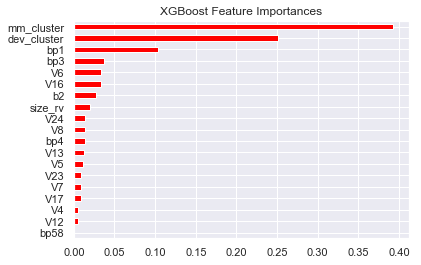

In [120]:
plot_feature_importances (xg_reg, 'barh', 'XGBoost Feature Importances','red', x_train)

In [121]:
def compute_residual (model, column, dataframe, xtest_dataframe, y_testdataframe):
    y_pred=model.predict(xtest_dataframe)
    y_pred_wap=np.exp(y_pred)
    y_actual_wap=np.exp(y_testdataframe)
    y_resid = y_actual_wap - y_pred_wap
    dataframe[column]=pd.DataFrame(y_resid)
    return(dataframe[column].describe())

In [122]:
compute_residual (xg_reg, 'residual_xgreg', df1, x_test, y_test) #Residual statistics of XGBoost of final model

count      656.000000
mean       609.342295
std       3652.932787
min      -8189.847656
25%       -817.170552
50%         52.466675
75%        835.749512
max      27853.220703
Name: residual_xgreg, dtype: float64

In [123]:
# Percentage Error vs projects for XGBoost of final model
percentage_error_projects (df1, 'residual_xgreg', 'percentage_error_xgreg','percentage_error_interval_xgreg') 

,percentage_error_interval_xgreg,project_number,percentage_projects
0,"(-inf, -30.0]",64,9.756098
1,"(-30.0, -20.0]",55,8.384146
2,"(-20.0, -10.0]",74,11.280488
3,"(-10.0, 0.0]",124,18.902439
4,"(0.0, 10.0]",156,23.780488
5,"(10.0, 20.0]",111,16.920732
6,"(20.0, 30.0]",35,5.335366
7,"(30.0, inf]",37,5.640244


In [124]:
# Mean Absolute Percentage Error of XG Boost Model residuals of final model
np.absolute(df1['percentage_error_xgreg']).mean()

16.81294154439647

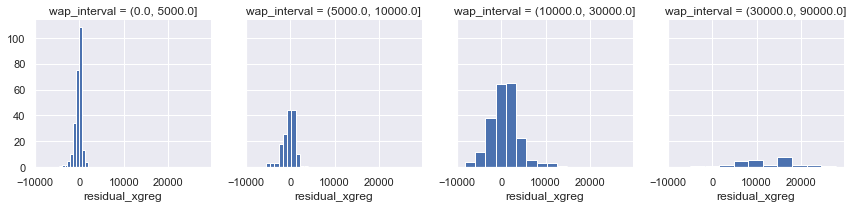

In [125]:
g = sns.FacetGrid(df1, col="wap_interval")
g = g.map(plt.hist, "residual_xgreg")

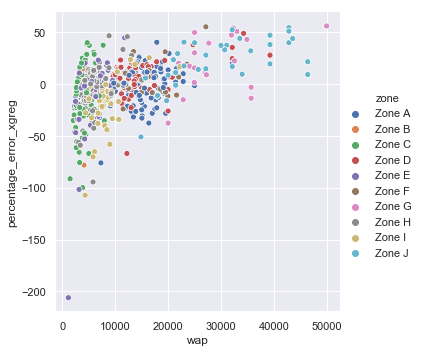

In [126]:
sns.relplot(x="wap", y="percentage_error_xgreg", hue="zone", data=df1)

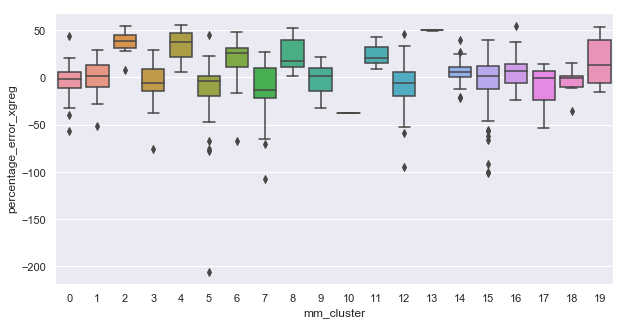

In [127]:
f, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="mm_cluster", y="percentage_error_xgreg", data=df1)

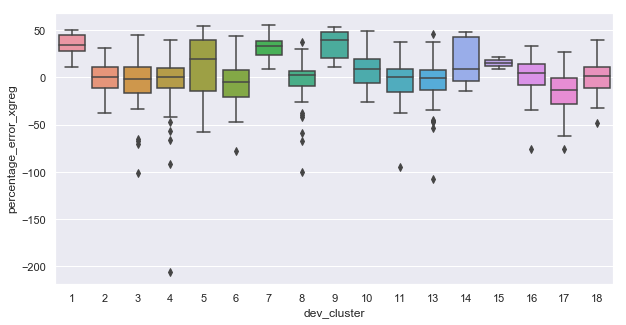

In [128]:
f, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="dev_cluster", y="percentage_error_xgreg", data=df1)

Linear Regression outperforms Extreme Gradient Boosting algorithm.

## 6. Extreme Gradient Boost Regressor Using All Features

In [129]:
include=['log_wap','mm_cluster','dev_cluster','b1','b2','b3','b4','b5','b6','b7','b8','bp1','bp3','bp4','bp5','bp6','bp7','bp8','bp48','bp58','min_size','max_size','size_rv','unit_type','construction_status','proj_bedrooms_clean','proj_launched_units','launch_year','size_range','V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15','V16','V17','V18','V19','V20','V21','V22','V23','V24','V25']
df3=pd.DataFrame(df1[include])

df3['launch_year']=df3['launch_year'].astype('int')
for i in ['unit_type','construction_status','proj_bedrooms_clean']: # Label-encoding of amenities features
    label_encoder(df3, i)
    
df3.head()

,log_wap,mm_cluster,dev_cluster,b1,b2,b3,b4,b5,b6,b7,...,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25
0,9.579418,3,16,106,5,0,0,0,0,0,...,-0.422871,-0.789669,-0.659173,0.189961,0.335592,1.264041,0.054089,-0.131723,-0.580872,0.412611
1,9.545526,3,16,0,98,52,0,0,0,0,...,-0.056276,-0.577943,-0.373556,-0.023348,0.538932,0.988884,-0.303059,0.348402,-0.405855,0.458890
2,9.545526,3,16,0,98,52,0,0,0,0,...,-0.055074,-0.553753,-0.389509,-0.025317,0.572751,1.003029,-0.347910,0.379972,-0.367028,0.492925
3,9.461644,3,3,107,13,0,0,0,0,0,...,-0.174178,-0.400852,-0.209210,-0.201405,0.652291,1.168787,0.021800,0.150187,-0.344659,0.357670
4,9.739884,3,11,1,22,10,0,0,0,0,...,-0.063372,-0.468529,-0.364467,-0.108515,0.692411,1.022727,-0.269232,0.352715,-0.367375,0.468766


In [130]:
dependent = 'log_wap'
independent = df3.columns != dependent 
x1 = df3.loc[:,independent]
y1 = df3[dependent]
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, random_state=8)

xg_reg_all=xgb.XGBRegressor(base_score=0, objective='reg:linear',n_estimators=170,learning_rate=0.065,reg_alpha=3)
xg_reg_all.fit(x1_train,y1_train)

XGBRegressor(base_score=0, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.065, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=170,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=3, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [131]:
# cross validate
scores_xgreg_all = cross_validate(xg_reg_all, x1_train, y1_train, cv=8,
                        return_train_score=True,
                        return_estimator=False)
scores_xgreg_all = pd.DataFrame(scores_xgreg_all)
scores_xgreg_all

,fit_time,score_time,test_score,train_score
0,0.683172,0.003994,0.889209,0.914637
1,0.635227,0.000000,0.874744,0.915002
2,0.691521,0.003994,0.892966,0.916996
3,0.597823,0.004056,0.897153,0.913282
4,0.605301,0.003995,0.897718,0.912363
5,0.490503,0.002048,0.888885,0.914535
6,0.531213,0.000000,0.895039,0.914929
7,0.618856,0.008081,0.867660,0.915511


In [132]:
print('Mean Test Score XGBoost Regressor using all features: ', scores_xgreg_all ['test_score'].mean())
print('Mean Train Score XGBoost Regressor using all features: ', scores_xgreg_all ['train_score'].mean())

Mean Test Score XGBoost Regressor using all features:  0.8879216758828586
Mean Train Score XGBoost Regressor using all features:  0.9146568509533863


In [133]:
print('R2 Score of XGBoost Regressor using all features:',model_r2score (xg_reg_all, x1_test, y1_test))

R2 Score of XGBoost Regressor using all features: 0.8892626630167864


In [134]:
#Residual statistics of XGBoost Regressor using all features
compute_residual (xg_reg_all, 'residual_xgreg_all', df1, x1_test, y1_test) 

count      656.000000
mean       594.099348
std       4028.850997
min     -13367.687500
25%       -893.623535
50%         -9.161743
75%        919.932983
max      27695.138672
Name: residual_xgreg_all, dtype: float64

In [135]:
# Percentage Error vs projects for XGBoost Regressor using all features
percentage_error_projects (df1, 'residual_xgreg_all', 'percentage_error_xgreg_all','percentage_error_interval_xgreg_all') 

,percentage_error_interval_xgreg_all,project_number,percentage_projects
0,"(-inf, -30.0]",78,11.890244
1,"(-30.0, -20.0]",50,7.621951
2,"(-20.0, -10.0]",83,12.652439
3,"(-10.0, 0.0]",119,18.140244
4,"(0.0, 10.0]",140,21.341463
5,"(10.0, 20.0]",104,15.853659
6,"(20.0, 30.0]",39,5.945122
7,"(30.0, inf]",43,6.554878


In [136]:
# Mean Absolute Percentage Error of XG Boost Regressor residuals using all features
np.absolute(df1['percentage_error_xgreg_all']).mean()

18.67728516877463

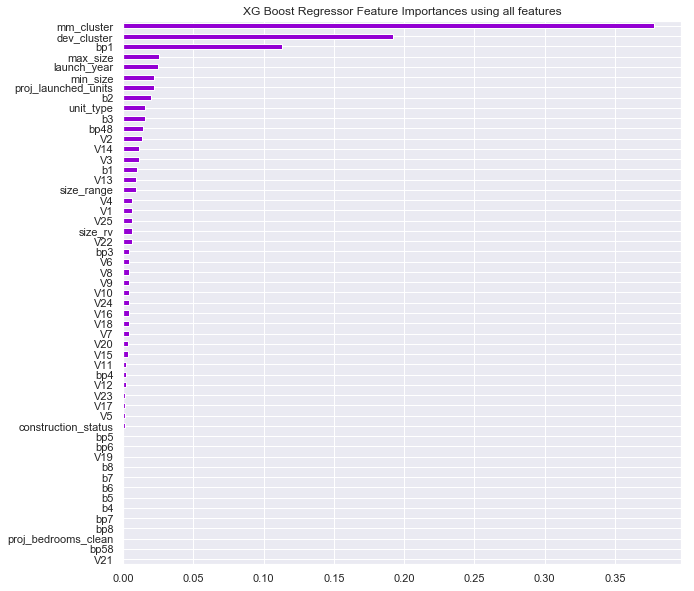

In [137]:
fig,ax=plt.subplots(figsize=(10,10)) # Feature importance visualisation for all features fed into XG Boost Regressor
fig=plot_feature_importances (xg_reg_all, 'barh', 'XG Boost Regressor Feature Importances using all features','darkviolet', x1_train)

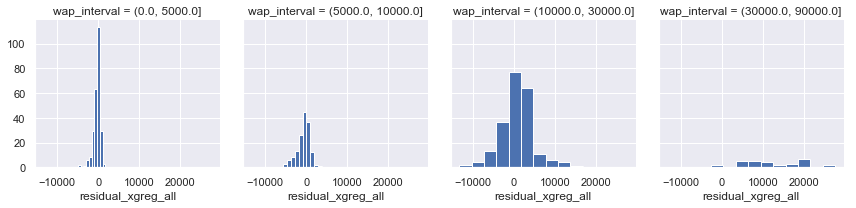

In [138]:
g = sns.FacetGrid(df1, col="wap_interval")
g = g.map(plt.hist, "residual_xgreg_all")

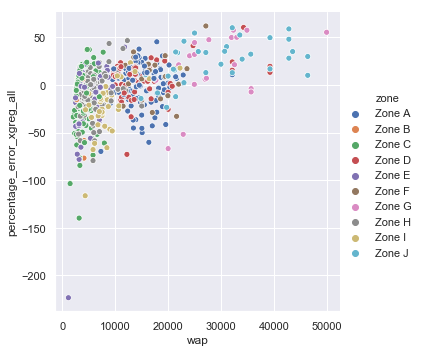

In [139]:
sns.relplot(x="wap", y="percentage_error_xgreg_all", hue="zone", data=df1)

Notice how regularisation has reduced cases of overprediction above 100% compared to linear regression model?

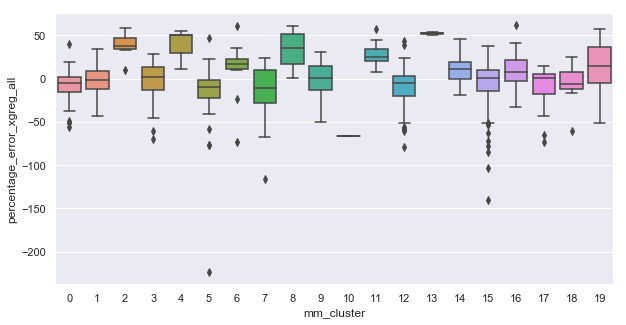

In [140]:
f, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="mm_cluster", y="percentage_error_xgreg_all", data=df1)

If we feed all the features to a XG Boost regressor, the XG Boost regressor will overfit even more and show worse performance compared to a handful of features selected for the final model.

## 7. Random Forest Regressor of Final Model

Let's deploy a Random Forest Regressor and see how it performs.

In [141]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=3000, n_jobs=5, random_state=5, max_depth=12)
rf.fit(x_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=12,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=3000, n_jobs=5,
           oob_score=False, random_state=5, verbose=0, warm_start=False)

In [142]:
print('Random Forest Regressor:',)
print(model_r2score (rf, x_test, y_test))

Random Forest Regressor:
0.9061214198050251


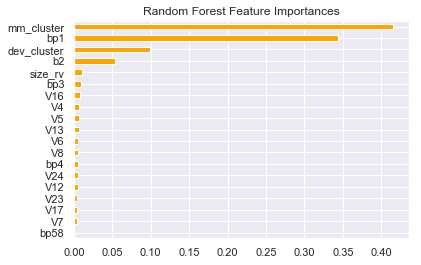

In [143]:
plot_feature_importances (rf, 'barh', 'Random Forest Feature Importances','orange', x_train)

In [144]:
compute_residual (rf, 'residual_rf', df1, x_test, y_test) # Residual statistics of Random Forest Regressor

count      656.000000
mean       604.086279
std       3561.681908
min      -9694.991003
25%       -751.103085
50%         -6.259042
75%        761.997595
max      26765.540416
Name: residual_rf, dtype: float64

In [145]:
# Percentage Error vs projects for Random Forest Regressor
percentage_error_projects (df1, 'residual_rf', 'percentage_error_rf','percentage_error_interval_rf') 

,percentage_error_interval_rf,project_number,percentage_projects
0,"(-inf, -30.0]",55,8.384146
1,"(-30.0, -20.0]",47,7.164634
2,"(-20.0, -10.0]",87,13.262195
3,"(-10.0, 0.0]",141,21.493902
4,"(0.0, 10.0]",156,23.780488
5,"(10.0, 20.0]",99,15.091463
6,"(20.0, 30.0]",38,5.792683
7,"(30.0, inf]",33,5.030488


In [146]:
# Mean Absolute Percentage Error for Random Forest Regressor
print('MAPE of Random Forest Regressor:',np.absolute(df1['percentage_error_rf']).mean())

MAPE of Random Forest Regressor: 16.563993038918447


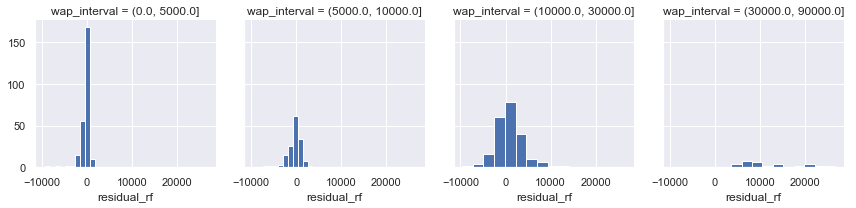

In [147]:
g = sns.FacetGrid(df1, col="wap_interval")
g = g.map(plt.hist, "residual_rf")

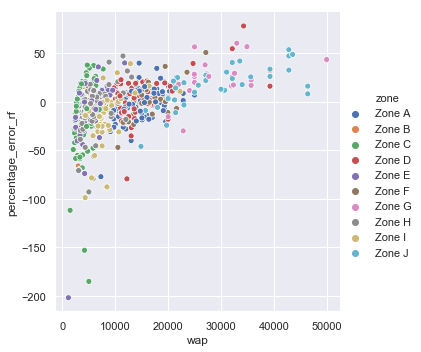

In [148]:
sns.relplot(x="wap", y="percentage_error_rf", hue="zone", data=df1)

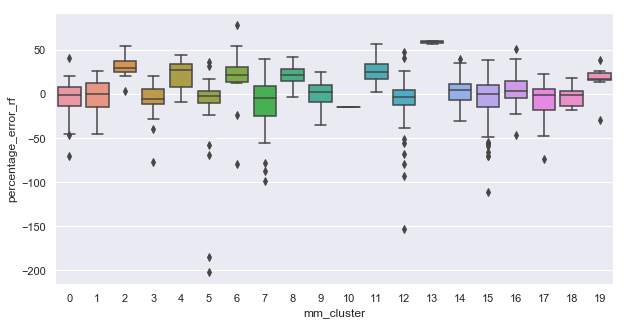

In [149]:
f, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="mm_cluster", y="percentage_error_rf", data=df1)

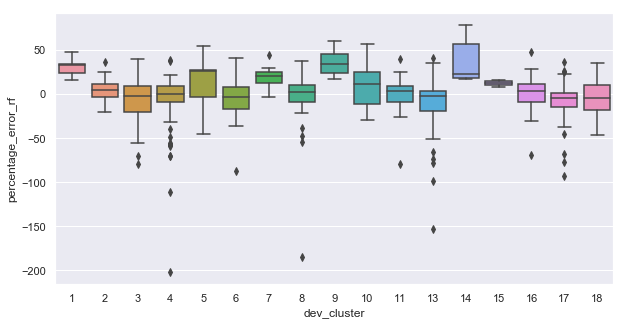

In [150]:
f, ax = plt.subplots(figsize=(10,5))
sns.boxplot(x="dev_cluster", y="percentage_error_rf", data=df1)

## 8. Lasso Regression Model

In [151]:
df4=pd.concat([df2, pd.get_dummies(df2['mm_cluster'],dtype=float),pd.get_dummies(df1['dev_cluster'],dtype=float), pd.get_dummies(df1['construction_status'],dtype=float)],axis=1)
df4=df4.drop(columns=['mm_cluster','dev_cluster'])
df4.head()

,log_wap,b2,bp1,bp3,bp4,bp58,size_rv,V4,V5,V6,...,11,13,14,15,16,17,18,Completed,Pre Launch,Under Construction
0,9.579418,5,0.954955,0.000000,0.0,0.0,1.383353,-0.067081,-0.185371,-0.032546,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
1,9.545526,98,0.000000,0.346667,0.0,0.0,0.372748,0.278550,-0.111899,0.312749,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
2,9.545526,98,0.000000,0.346667,0.0,0.0,0.372748,0.282199,-0.090756,0.292134,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,9.461644,13,0.891667,0.000000,0.0,0.0,1.187398,0.391827,-0.249752,0.281397,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,9.739884,22,0.030303,0.303030,0.0,0.0,1.519184,0.307399,-0.107702,0.292808,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [152]:
dept = 'log_wap'
indept = df4.columns != dept
x2 = df4.loc[:,indept]
y2 = df4[dept]
x2_train, x2_test, y2_train, y2_test = train_test_split(x2, y2, random_state=8)

from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.0001,max_iter=10000, tol=0.0001)
lasso.fit(x2_train, y2_train)

Lasso(alpha=0.0001, copy_X=True, fit_intercept=True, max_iter=10000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [153]:
# cross validate
scores_lasso = cross_validate(lasso , x2_train, y2_train, cv=8,
                        return_train_score=True,
                        return_estimator=False)
scores_lasso = pd.DataFrame(scores_lasso)
scores_lasso

,fit_time,score_time,test_score,train_score
0,0.052530,0.003993,0.939977,0.946152
1,0.039614,0.000000,0.937380,0.946748
2,0.053385,0.000000,0.950702,0.944926
3,0.046866,0.000000,0.936555,0.946614
4,0.054330,0.000000,0.949936,0.944939
5,0.040086,0.004363,0.941735,0.945981
6,0.029641,0.000000,0.939641,0.946411
7,0.032244,0.000000,0.938427,0.946398


In [154]:
print('Mean Test Score using Lasso Regression: ', scores_lasso ['test_score'].mean())
print('Mean Train Score using Lasso Regression: ', scores_lasso ['train_score'].mean())

Mean Test Score using Lasso Regression:  0.9417942347271169
Mean Train Score using Lasso Regression:  0.9460212331257485


In [155]:
print('Lasso Regressor:',)
print(model_r2score (lasso, x2_test, y2_test))

Lasso Regressor:
0.941746572321237


Let's investigate how model performance varies with values of regularisation parameter alpha.

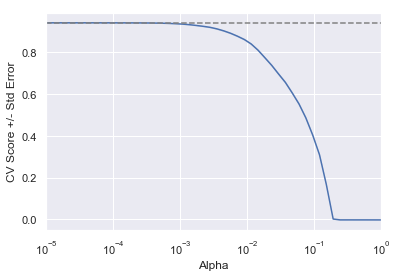

In [156]:
from sklearn.model_selection import cross_val_score

# Create an array of alphas and lists to store scores
alpha_space = np.logspace(-5, 0, 50)
lasso_scores = []
lasso_scores_std = []

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    lasso.alpha = alpha
    
    # Perform 10-fold CV: lasso_cv_scores again with a different sklearn library of course
    lasso_cv_scores = cross_val_score(lasso, x2_train, y2_train, cv=8)
    
    # Append the mean of lasso_cv_scores to lasso_scores
    lasso_scores.append(np.mean(lasso_cv_scores))
    
    # Append the std of lasso_cv_scores to lasso_scores_std
    lasso_scores_std.append(np.std(lasso_cv_scores))

# Use this function to create a plot    
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

# Display the plot
display_plot(lasso_scores, lasso_scores_std)

Strategy for fine-tuning Lasso Regression model: small value of alpha and larger number of iterations.

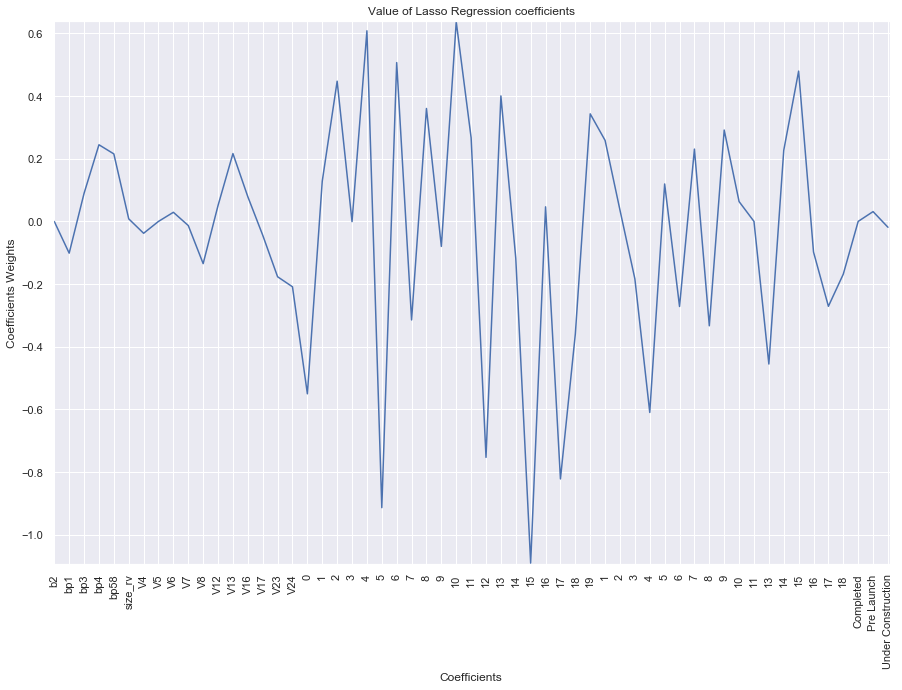

In [157]:
# Plot the Lasso Regression coefficients importance
plt.figure(figsize=(15,10)) 
plt.plot(range(len(x2_train.columns)), lasso.coef_)
plt.xticks(range(len(x2_train.columns)), x2_train.columns, rotation=90) 
plt.margins(0.002)
plt.xlabel('Coefficients')
plt.ylabel('Coefficients Weights')
plt.title('Value of Lasso Regression coefficients')
plt.show()

Let's look at how coefficient weights shrink to zero gradually as value of alpha is increased.

(2.5118864315095876e-07,
 3981071.705534961,
 -1.1809577636156272,
 0.757993705460571)

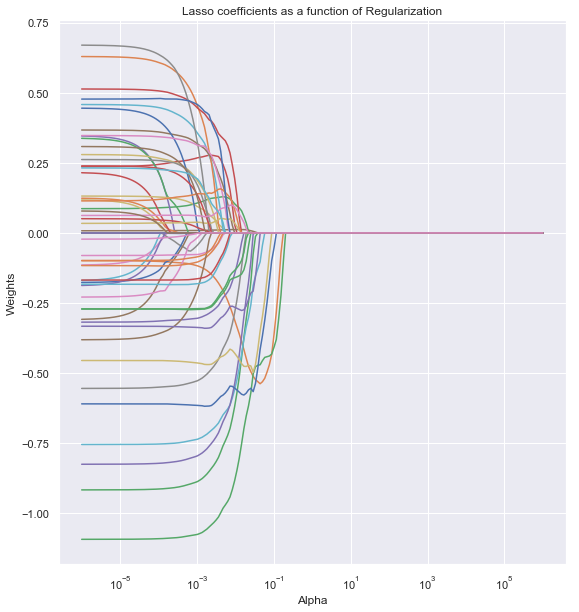

In [158]:
coefs = []
alphas = np.logspace(-6, 6, 200)

#Save same dataframe containing lasso regressor features with different name as we are trying a wide different
#range of alphas
lasso_clone = Lasso(alpha=0.0001,max_iter=100000, tol=0.0001)

# Train the model with different regularisation strengths
for a in alphas:
    lasso_clone.set_params(alpha=a) #Alpha parameter variation
    lasso_clone.fit(x2_train, y2_train)
    coefs.append(lasso_clone.coef_) 
    
# Display results
plt.figure(figsize=(20, 10))
plt.subplot(121)
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Weights')
plt.title('Lasso coefficients as a function of Regularization')
plt.axis('tight')

It can be inferred that shrinking of coefficients is drastic and takes place around a certain interval width of alpha.

In [159]:
compute_residual (lasso, 'residual_lasso', df1, x2_test, y2_test) # Residual statistics of Lasso Regressor

count      656.000000
mean      -109.356714
std       2519.695445
min     -21519.747459
25%       -797.584806
50%        -34.814400
75%        587.514735
max      11794.802510
Name: residual_lasso, dtype: float64

In [160]:
# Percentage Error vs projects for Random Forest Regressor
percentage_error_projects (df1, 'residual_lasso', 'percentage_error_lasso','percentage_error_interval_lasso') 

,percentage_error_interval_lasso,project_number,percentage_projects
0,"(-inf, -30.0]",48,7.317073
1,"(-30.0, -20.0]",40,6.097561
2,"(-20.0, -10.0]",98,14.939024
3,"(-10.0, 0.0]",148,22.560976
4,"(0.0, 10.0]",170,25.914634
5,"(10.0, 20.0]",106,16.158537
6,"(20.0, 30.0]",32,4.878049
7,"(30.0, inf]",14,2.134146


In [161]:
# Mean Absolute Percentage Error for Lasso Regressor
print('MAPE of Lasso Regressor:',np.absolute(df1['percentage_error_lasso']).mean())

MAPE of Lasso Regressor: 14.015369300644632


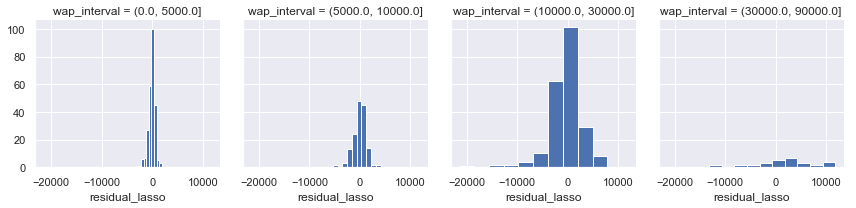

In [162]:
sns.FacetGrid(df1, col="wap_interval").map(plt.hist, "residual_lasso")

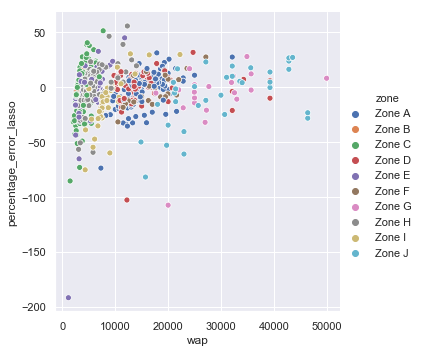

In [163]:
sns.relplot(x="wap", y="percentage_error_lasso", hue="zone", data=df1)

Notice how the number of cases overpredicted by over 100% has decreased? For these specific cases, the amount of overpredictions has decreased as well with the help of regularisation. Regularisation has helped to weed out numerous multicorrelated predictor variables. Drastic improvement in model performance!

Violin plots show median, interquartile range and kernel density distribution.
Lets look at how prices vary across clusters for micromarkets and developers.

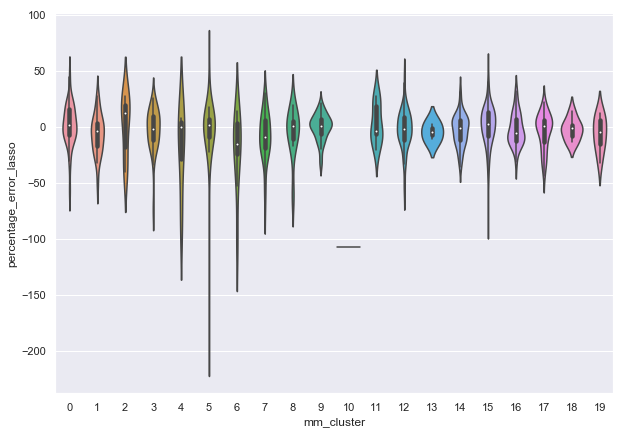

In [164]:
f, ax = plt.subplots(figsize=(10,7))
sns.violinplot(x="mm_cluster", y="percentage_error_lasso", data=df1)

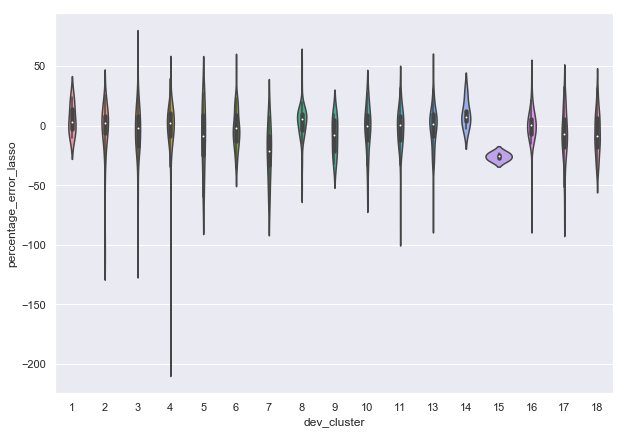

In [165]:
f, ax = plt.subplots(figsize=(10,7))
sns.violinplot(x="dev_cluster", y="percentage_error_lasso", data=df1)

## 10. Conclusion / Key Insights

1. Micromarket and developer clusters show good variations in prices. 

2. The final model shows high R-squared value of above 0.94 which indicates a good fit with minimised residuals.

3. Residual diagnostics of the base and final models show robust predictive models.

4. It has been so far easy to predict most of the projects with low errors in price predictions (low error percentage), another indication of a robust model. Most of the projects fell under lower price categories. Projects with higher errors in predictions occur by chances and occur less frequently.

5. Linear Regression outperforms both Extreme Gradient Boosting algorithm and Random Forest Regressor. The underlying data structure between chosen predictor variables and dependent variable is linear. Models with complexity greater than that of linear regression will capture variations and noise and thus perform relatively poorer in predicted real estate prices.

6. Significant time should be spent on hyperparameter tuning to maximise model performance using various combinations of parameters.

7. Features should be chosen carefully to avoid problems of multicollinearity and overfitting. They should be able to contribute to variations in dependent variable. Exploratory data analysis involving multivariate/bivariate plots and statistical tests should aid in that. 

8. Regularisation has shrunk importance (i.e weights) of numerous multicorrelated predictor variables and improved model performance.

8. The predictive power of models degenerate over time. Backtesting helps us understand for how long a model will give accurate predictions.
